In [252]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import norm
from sklearn.mixture import GaussianMixture
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from astropy.stats import sigma_clip
from scipy.stats import entropy

rng = np.random.default_rng()

In [253]:
class SN:
    ia_keys = ['z', 't0', 'x0', 'x1', 'c', 'log_x0', 'log_x1', 'log_ia_chisq', 
               'log_x0_err_ratio', 'log_x1_err_ratio', 'log_c_err_ratio']
    ibc_keys = ['z', 'texp', 'mej', 'fni', 'vej', 'log_vej', 'log_fni', 'log_mej',
                 'log_ibc_chisq', 'log_mej_err_ratio', 'log_vej_err_ratio', 'log_fni_err_ratio']
    ia_fit = {key:None for key in ia_keys}
    ibc_fit = {key:None for key in ibc_keys}
    
    def __init__(self, true_class, true_dict):
        self.true_class = true_class
        if self.true_class == 'ia':
            self.true_params = {key:true_dict[key] for key in self.ia_keys}
        elif self.true_class == 'ibc':
            self.true_params = {key:true_dict[key] for key in self.ibc_keys}
        else:
            raise ValueError("SN has to be either ia or ibc")
            
    def fit_as_ia(self, results_dict):
        self.ia_fit = {key:results_dict[key] for key in self.ia_keys[1:]}
    
    def fit_as_ibc(self, results_dict):
        self.ibc_fit = {key:results_dict[key] for key in self.ibc_keys[1:]}
        self.ibc_fit.update({'log_vej': np.log10(self.ibc_fit['vej'])})

In [254]:
class real_SN:
    ia_keys = ['z', 't0', 'x0', 'x1', 'c']
    ibc_keys = ['z', 'texp', 'mej', 'fni', 'vej']
    ia_fit = {key:None for key in ia_keys}
    ibc_fit = {key:None for key in ibc_keys}
    
    def __init__(self, true_class, true_redshift):
        self.true_class = true_class
        self.true_redshift = true_redshift
        # if self.true_class == 'ia':
        #     self.true_params = {key:true_dict[key] for key in self.ia_keys}
        # elif self.true_class == 'ibc':
        #     self.true_params = {key:true_dict[key] for key in self.ibc_keys}
        # else:
        #     raise ValueError("SN has to be either ia or ibc")
            
    def fit_as_ia(self, results_dict):
        self.ia_fit = {key:results_dict[key] for key in self.ia_keys[1:]}
    
    def fit_as_ibc(self, results_dict):
        self.ibc_fit = {key:results_dict[key] for key in self.ibc_keys[1:]}

In [255]:
data = np.load("fitted_sne_real_012826.npz", allow_pickle=True)
phot_data = np.load("fitted_sne_real_012126_phot.npz", allow_pickle=True)

true_ia_sne = data['ia']
true_ibc_sne = data['ibc']
all_sne = np.concatenate((true_ia_sne, true_ibc_sne))
true_ia_phot_sne = phot_data['ia']
true_ibc_phot_sne = phot_data['ibc']
all_phot_sne = np.concatenate((true_ia_phot_sne, true_ibc_phot_sne))
len(true_ibc_sne), len(all_sne), len(true_ia_sne)/len(all_sne)


(252, 2674, 0.9057591623036649)

In [256]:
all_sne[1].ia_fit.keys()

dict_keys(['success', 'ncall', 'chisq', 'ndof', 'z', 'z_err', 't0', 't0_err', 'x0', 'x0_err', 'x1', 'x1_err', 'c', 'c_err', 'mwebv', 'mwebv_err', 'mwr_v', 'mwr_v_err', 'z_z_cov', 'z_t0_cov', 'z_x0_cov', 'z_x1_cov', 'z_c_cov', 'z_mwebv_cov', 'z_mwr_v_cov', 't0_z_cov', 't0_t0_cov', 't0_x0_cov', 't0_x1_cov', 't0_c_cov', 't0_mwebv_cov', 't0_mwr_v_cov', 'x0_z_cov', 'x0_t0_cov', 'x0_x0_cov', 'x0_x1_cov', 'x0_c_cov', 'x0_mwebv_cov', 'x0_mwr_v_cov', 'x1_z_cov', 'x1_t0_cov', 'x1_x0_cov', 'x1_x1_cov', 'x1_c_cov', 'x1_mwebv_cov', 'x1_mwr_v_cov', 'c_z_cov', 'c_t0_cov', 'c_x0_cov', 'c_x1_cov', 'c_c_cov', 'c_mwebv_cov', 'c_mwr_v_cov', 'mwebv_z_cov', 'mwebv_t0_cov', 'mwebv_x0_cov', 'mwebv_x1_cov', 'mwebv_c_cov', 'mwebv_mwebv_cov', 'mwebv_mwr_v_cov', 'mwr_v_z_cov', 'mwr_v_t0_cov', 'mwr_v_x0_cov', 'mwr_v_x1_cov', 'mwr_v_c_cov', 'mwr_v_mwebv_cov', 'mwr_v_mwr_v_cov'])

In [257]:
all_sne[1].ibc_fit.keys()

dict_keys(['success', 'ncall', 'chisq', 'ndof', 'z', 'z_err', 't0', 't0_err', 'redshift', 'redshift_err', 'texp', 'texp_err', 'mej', 'mej_err', 'fni', 'fni_err', 'vej', 'vej_err', 'mwebv', 'mwebv_err', 'mwr_v', 'mwr_v_err', 'z_z_cov', 'z_t0_cov', 'z_redshift_cov', 'z_texp_cov', 'z_mej_cov', 'z_fni_cov', 'z_vej_cov', 'z_mwebv_cov', 'z_mwr_v_cov', 't0_z_cov', 't0_t0_cov', 't0_redshift_cov', 't0_texp_cov', 't0_mej_cov', 't0_fni_cov', 't0_vej_cov', 't0_mwebv_cov', 't0_mwr_v_cov', 'redshift_z_cov', 'redshift_t0_cov', 'redshift_redshift_cov', 'redshift_texp_cov', 'redshift_mej_cov', 'redshift_fni_cov', 'redshift_vej_cov', 'redshift_mwebv_cov', 'redshift_mwr_v_cov', 'texp_z_cov', 'texp_t0_cov', 'texp_redshift_cov', 'texp_texp_cov', 'texp_mej_cov', 'texp_fni_cov', 'texp_vej_cov', 'texp_mwebv_cov', 'texp_mwr_v_cov', 'mej_z_cov', 'mej_t0_cov', 'mej_redshift_cov', 'mej_texp_cov', 'mej_mej_cov', 'mej_fni_cov', 'mej_vej_cov', 'mej_mwebv_cov', 'mej_mwr_v_cov', 'fni_z_cov', 'fni_t0_cov', 'fni_redshif

In [258]:
for sn in all_sne:
    sn.ibc_fit.update({'log_vej': np.log10(sn.ibc_fit['vej'])})
    sn.ibc_fit.update({'log_mej': np.log10(sn.ibc_fit['mej'])})
    sn.ia_fit.update({'log_x0': np.log10(sn.ia_fit['x0'])})
    sn.ia_fit.update({'log_x1': np.log10(sn.ia_fit['x1'] + 5)})
    sn.ibc_fit.update({'log_fni': np.log10(sn.ibc_fit['fni'])})
    sn.ibc_fit.update({'log_ibc_chisq': np.log10(sn.ibc_fit['chisq'])})
    sn.ia_fit.update({'log_ia_chisq': np.log10(sn.ia_fit['chisq'])})
    sn.ia_fit.update({'log_x0_err_ratio': np.log10(np.abs(sn.ia_fit['x0_err'])) - np.log10(sn.ia_fit['x0'])})
    # sn.ia_fit.update({'x1_err_ratio': np.abs(sn.ia_fit['x1_err']/sn.ia_fit['x1'])})
    # sn.ia_fit.update({'c_err_ratio': np.abs(sn.ia_fit['c_err']/sn.ia_fit['c'])})
    sn.ia_fit.update({'log_x1_err_ratio': np.log10(np.abs(sn.ia_fit['x1_err'])) - np.log10(np.abs(sn.ia_fit['x1']))})
    sn.ia_fit.update({'log_c_err_ratio': np.log10(np.abs(sn.ia_fit['c_err'])) - np.log10(np.abs(sn.ia_fit['c']))})
    # sn.ibc_fit.update({'mej_err_ratio': np.abs(sn.ibc_fit['mej_err'])/sn.ibc_fit['mej']})
    # sn.ibc_fit.update({'fni_err_ratio': np.abs(sn.ibc_fit['fni_err'])/sn.ibc_fit['fni']})
    sn.ibc_fit.update({'log_mej_err_ratio': np.log10(np.abs(sn.ibc_fit['mej_err'])) - np.log10(sn.ibc_fit['mej'])})
    sn.ibc_fit.update({'log_fni_err_ratio': np.log10(np.abs(sn.ibc_fit['fni_err'])) - np.log10(sn.ibc_fit['fni'])})
    sn.ibc_fit.update({'log_vej_err_ratio': np.log10(np.abs(sn.ibc_fit['vej_err'])) - np.log10(sn.ibc_fit['vej'])})
    sn.ibc_fit.update({'z': sn.ibc_fit['redshift']})
    sn.ibc_fit.update({'z_err': sn.ibc_fit['redshift_err']})



for sn in all_phot_sne:
    sn.ibc_fit.update({'log_vej': np.log10(sn.ibc_fit['vej'])})
    sn.ibc_fit.update({'log_mej': np.log10(sn.ibc_fit['mej'])})
    sn.ia_fit.update({'log_x0': np.log10(sn.ia_fit['x0'])})
    sn.ia_fit.update({'log_x1': np.log10(sn.ia_fit['x1'] + 5)})
    sn.ibc_fit.update({'log_fni': np.log10(sn.ibc_fit['fni'])})


In [259]:
np.min([sn.ia_fit['c'] for sn in true_ia_sne])

-0.5323575724410236

In [260]:
np.sort([sn.ia_fit['log_c_err_ratio'] for sn in true_ia_sne])[::-1]

array([ 3.44470925,  2.41826662,  2.18151665, ..., -1.78197836,
       -1.78548445, -1.88756356])

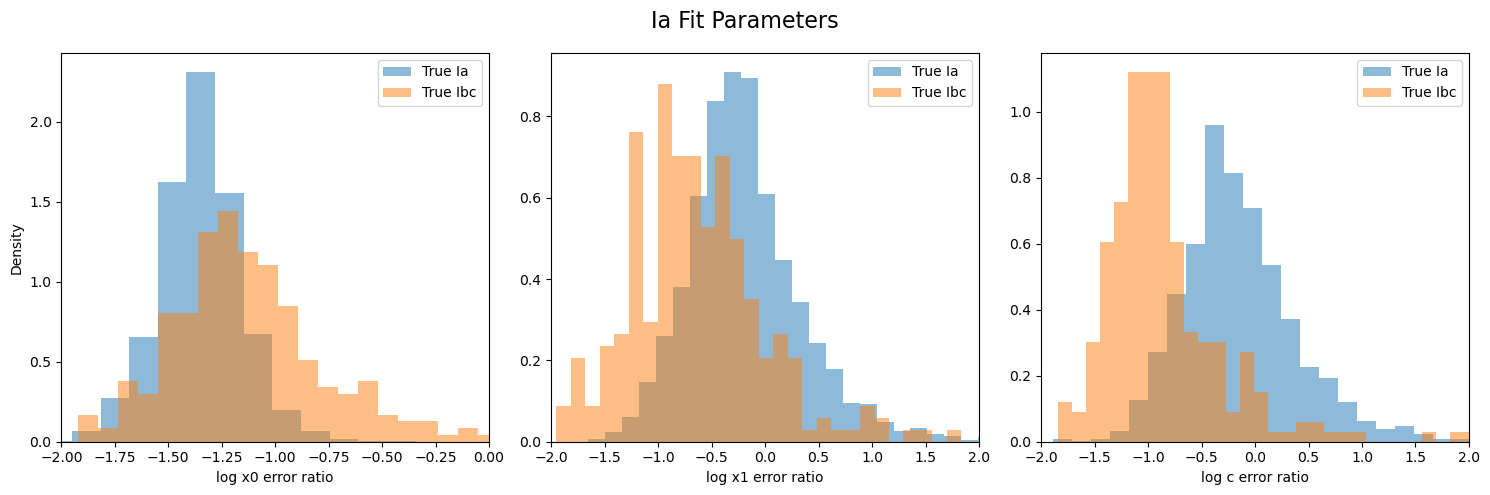

In [261]:
# Histogram error ratios for x0, x1, c

fig, ax = plt.subplots(1, 3, figsize=(15, 5))

ax[0].hist([sn.ia_fit['log_x0_err_ratio'] for sn in true_ia_sne], bins=30, alpha=0.5, label='True Ia', density=True)
ax[0].hist([sn.ia_fit['log_x0_err_ratio'] for sn in true_ibc_sne], bins=30, alpha=0.5, label='True Ibc', density=True)
ax[0].set_xlabel('log x0 error ratio')
ax[0].set_ylabel('Density')
ax[0].set_xlim(-2, 0)
ax[0].legend()

ax[1].hist([sn.ia_fit['log_x1_err_ratio'] for sn in true_ia_sne], bins=30, alpha=0.5, label='True Ia', density=True)
ax[1].hist([sn.ia_fit['log_x1_err_ratio'] for sn in true_ibc_sne], bins=30, alpha=0.5, label='True Ibc', density=True)
ax[1].set_xlabel('log x1 error ratio')
ax[1].set_xlim(-2, 2)
ax[1].legend()

ax[2].hist([sn.ia_fit['log_c_err_ratio'] for sn in true_ia_sne], bins=30, alpha=0.5, label='True Ia', density=True)
ax[2].hist([sn.ia_fit['log_c_err_ratio'] for sn in true_ibc_sne], bins=30, alpha=0.5, label='True Ibc', density=True)
ax[2].set_xlabel('log c error ratio')
ax[2].set_xlim(-2, 2)
ax[2].legend()

# set title
fig.suptitle('Ia Fit Parameters', fontsize=16)

plt.tight_layout()
plt.show()

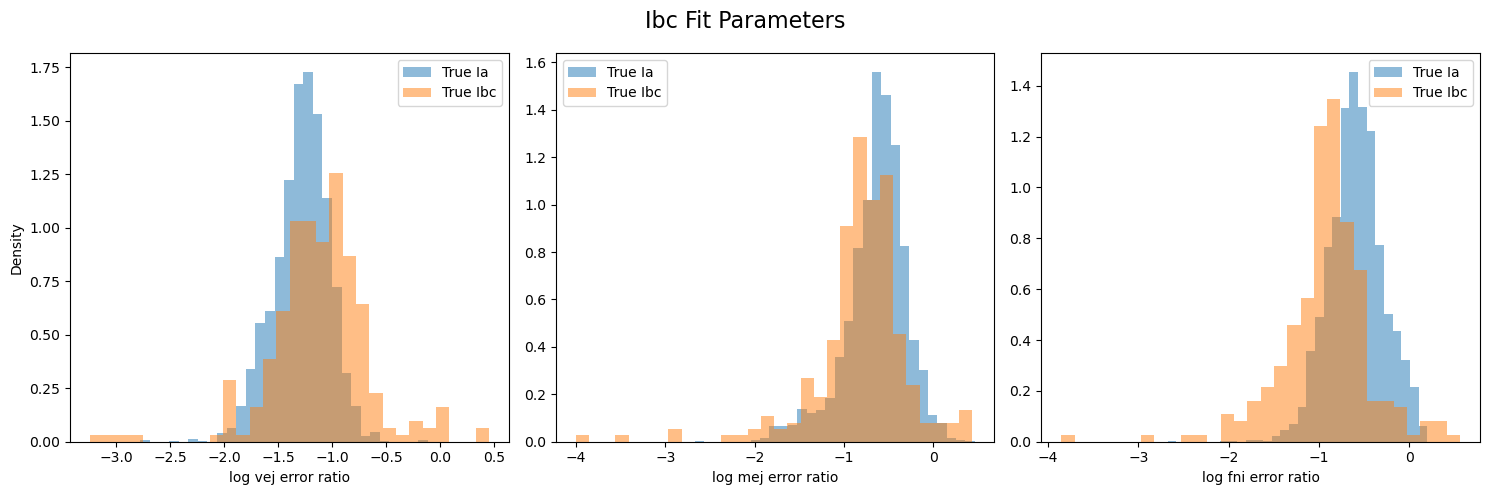

In [262]:
# Histogram error ratios for mej, vej, fni 

fig, ax = plt.subplots(1, 3, figsize=(15, 5))

ax[0].hist([sn.ibc_fit['log_vej_err_ratio'] for sn in true_ia_sne], bins=30, alpha=0.5, label='True Ia', density=True)
ax[0].hist([sn.ibc_fit['log_vej_err_ratio'] for sn in true_ibc_sne], bins=30, alpha=0.5, label='True Ibc', density=True)
ax[0].set_xlabel('log vej error ratio')
ax[0].set_ylabel('Density')
# ax[0].set_xlim(np.percentile(np.concatenate([[sn.ibc_fit['log_vej_err_ratio'] for sn in true_ia_sne], [sn.ibc_fit['log_vej_err_ratio'] for sn in true_ibc_sne]]), [1, 99]))
ax[0].legend()

ax[1].hist([sn.ibc_fit['log_mej_err_ratio'] for sn in true_ia_sne], bins=30, alpha=0.5, label='True Ia', density=True)
ax[1].hist([sn.ibc_fit['log_mej_err_ratio'] for sn in true_ibc_sne], bins=30, alpha=0.5, label='True Ibc', density=True)
ax[1].set_xlabel('log mej error ratio')
ax[1].legend()

ax[2].hist([sn.ibc_fit['log_fni_err_ratio'] for sn in true_ia_sne], bins=30, alpha=0.5, label='True Ia', density=True)
ax[2].hist([sn.ibc_fit['log_fni_err_ratio'] for sn in true_ibc_sne], bins=30, alpha=0.5, label='True Ibc', density=True)
ax[2].set_xlabel('log fni error ratio')
ax[2].legend()


# set title
fig.suptitle('Ibc Fit Parameters', fontsize=16)

plt.tight_layout()
plt.show()

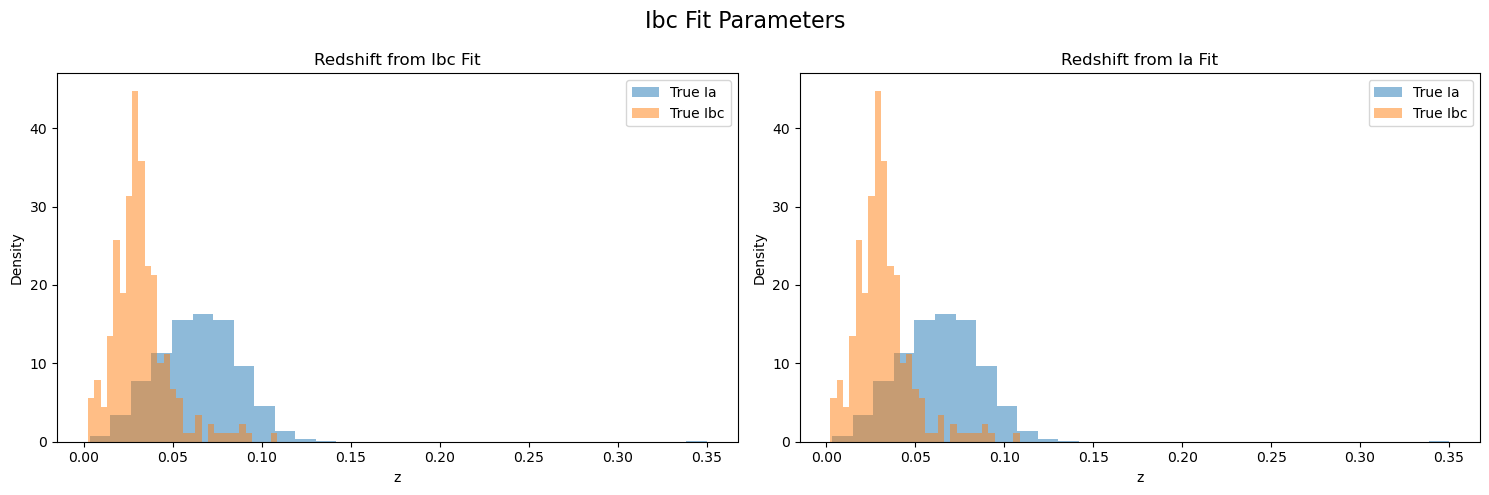

In [263]:
# Histogram ia and ibc redshifts

fig, ax = plt.subplots(1, 2, figsize=(15, 5))

ax[0].hist([sn.ibc_fit['z'] for sn in true_ia_sne], bins=30, alpha=0.5, label='True Ia', density=True)
ax[0].hist([sn.ibc_fit['z'] for sn in true_ibc_sne], bins=30, alpha=0.5, label='True Ibc', density=True)
ax[0].set_xlabel('z')
ax[0].set_ylabel('Density')
# ax[0].set_xlim(np.percentile(np.concatenate([[sn.ibc_fit['log_vej_err_ratio'] for sn in true_ia_sne], [sn.ibc_fit['log_vej_err_ratio'] for sn in true_ibc_sne]]), [1, 99]))
ax[0].legend()
ax[0].set_title('Redshift from Ibc Fit')

ax[1].hist([sn.ia_fit['z'] for sn in true_ia_sne], bins=30, alpha=0.5, label='True Ia', density=True)
ax[1].hist([sn.ia_fit['z'] for sn in true_ibc_sne], bins=30, alpha=0.5, label='True Ibc', density=True)
ax[1].set_xlabel('z')
ax[1].set_ylabel('Density')
# ax[0].set_xlim(np.percentile(np.concatenate([[sn.ibc_fit['log_vej_err_ratio'] for sn in true_ia_sne], [sn.ibc_fit['log_vej_err_ratio'] for sn in true_ibc_sne]]), [1, 99]))
ax[1].legend()
ax[1].set_title('Redshift from Ia Fit')

# set title
fig.suptitle('Ibc Fit Parameters', fontsize=16)

plt.tight_layout()
plt.show()

In [264]:
sum(np.array([sn.ia_fit['x1'] for sn in all_sne]) <= 0), min(np.array([sn.ia_fit['x1'] for sn in all_sne]))

(1083, -4.9999999991920685)

In [265]:
all_sne[100].true_class

'SN Ia'

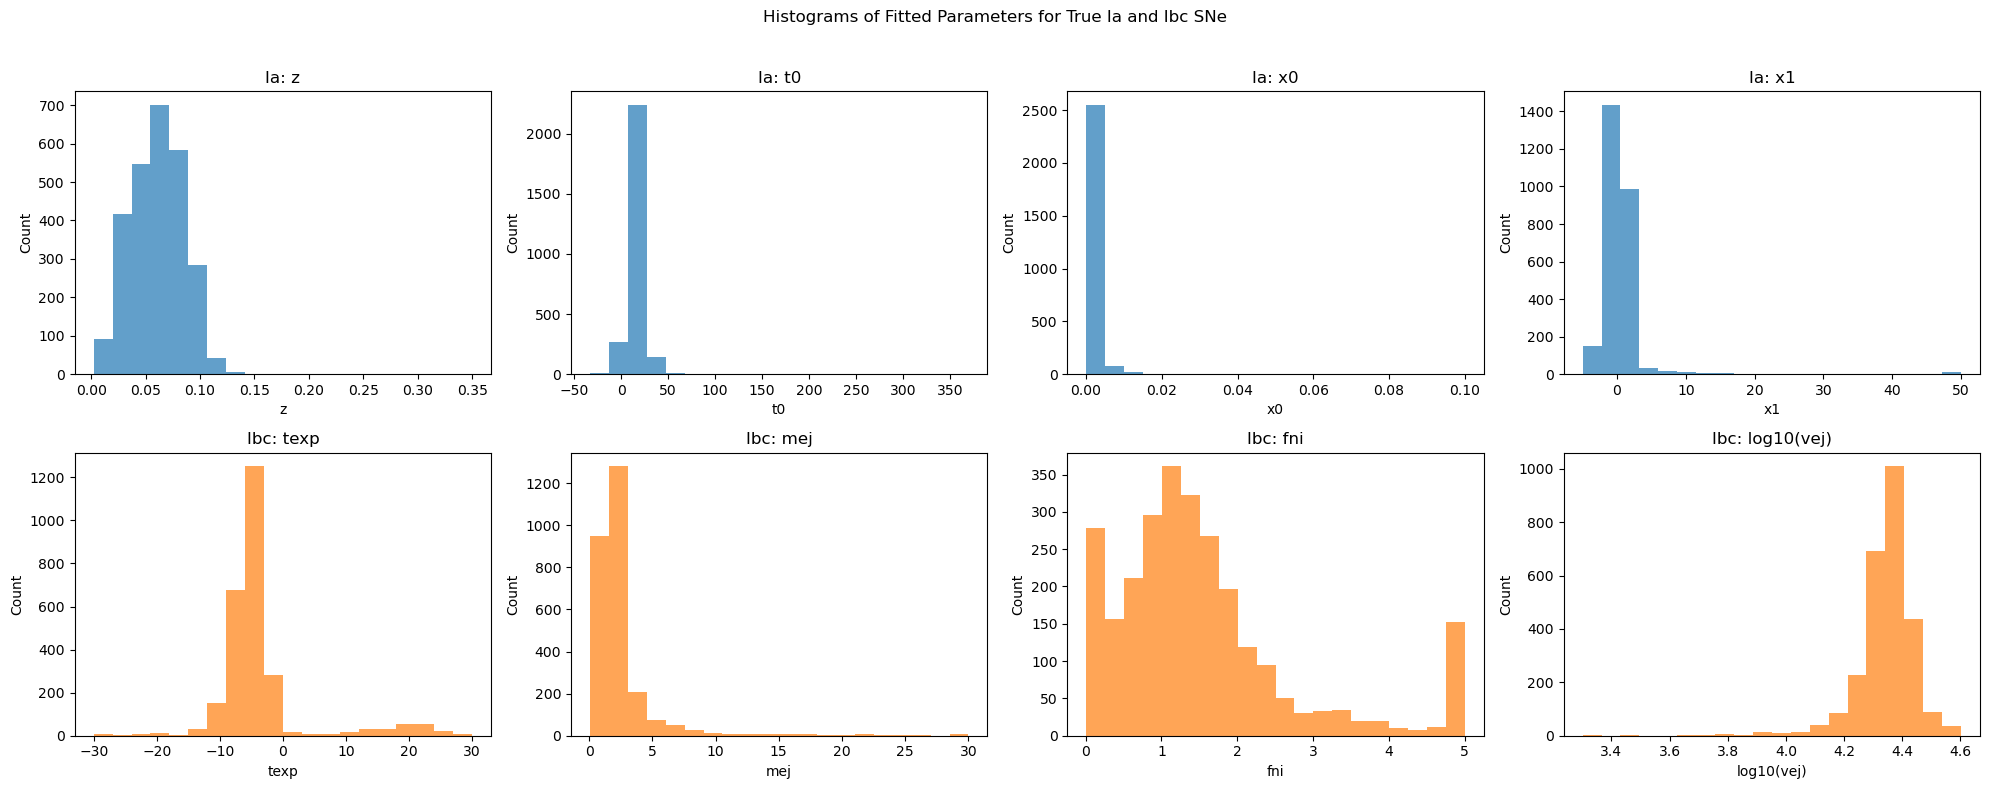

In [266]:
ia_param_names = SN.ia_keys  # ['t0', 'x0', 'x1', 'c']
ibc_param_names = SN.ibc_keys[1:]  # ['texp', 'mej', 'fni', 'vej']

fig, axes = plt.subplots(2, 4, figsize=(20, 8))
fig.suptitle("Histograms of Fitted Parameters for True Ia and Ibc SNe")

# Plot Ia fitted parameters
for i, param in enumerate(ia_param_names[:4]):
    values = [sn.ia_fit[param] for sn in all_sne if sn.ia_fit[param] is not None]
    axes[0, i].hist(values, bins=20, color='tab:blue', alpha=0.7)
    axes[0, i].set_title(f"Ia: {param}")
    axes[0, i].set_xlabel(param)
    axes[0, i].set_ylabel("Count")

# Plot Ibc fitted parameters
for i, param in enumerate(ibc_param_names[:4]):
    values = [sn.ibc_fit[param] for sn in all_sne if sn.ibc_fit[param] is not None]
    if param == 'vej':
        # Plot log10 for vej
        values = [np.log10(v) for v in values if v > 0]
        axes[1, i].hist(values, bins=20, color='tab:orange', alpha=0.7)
        axes[1, i].set_title(f"Ibc: log10({param})")
        axes[1, i].set_xlabel(f"log10({param})")
    else:
        axes[1, i].hist(values, bins=20, color='tab:orange', alpha=0.7)
        axes[1, i].set_title(f"Ibc: {param}")
        axes[1, i].set_xlabel(param)
    axes[1, i].set_ylabel("Count")

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

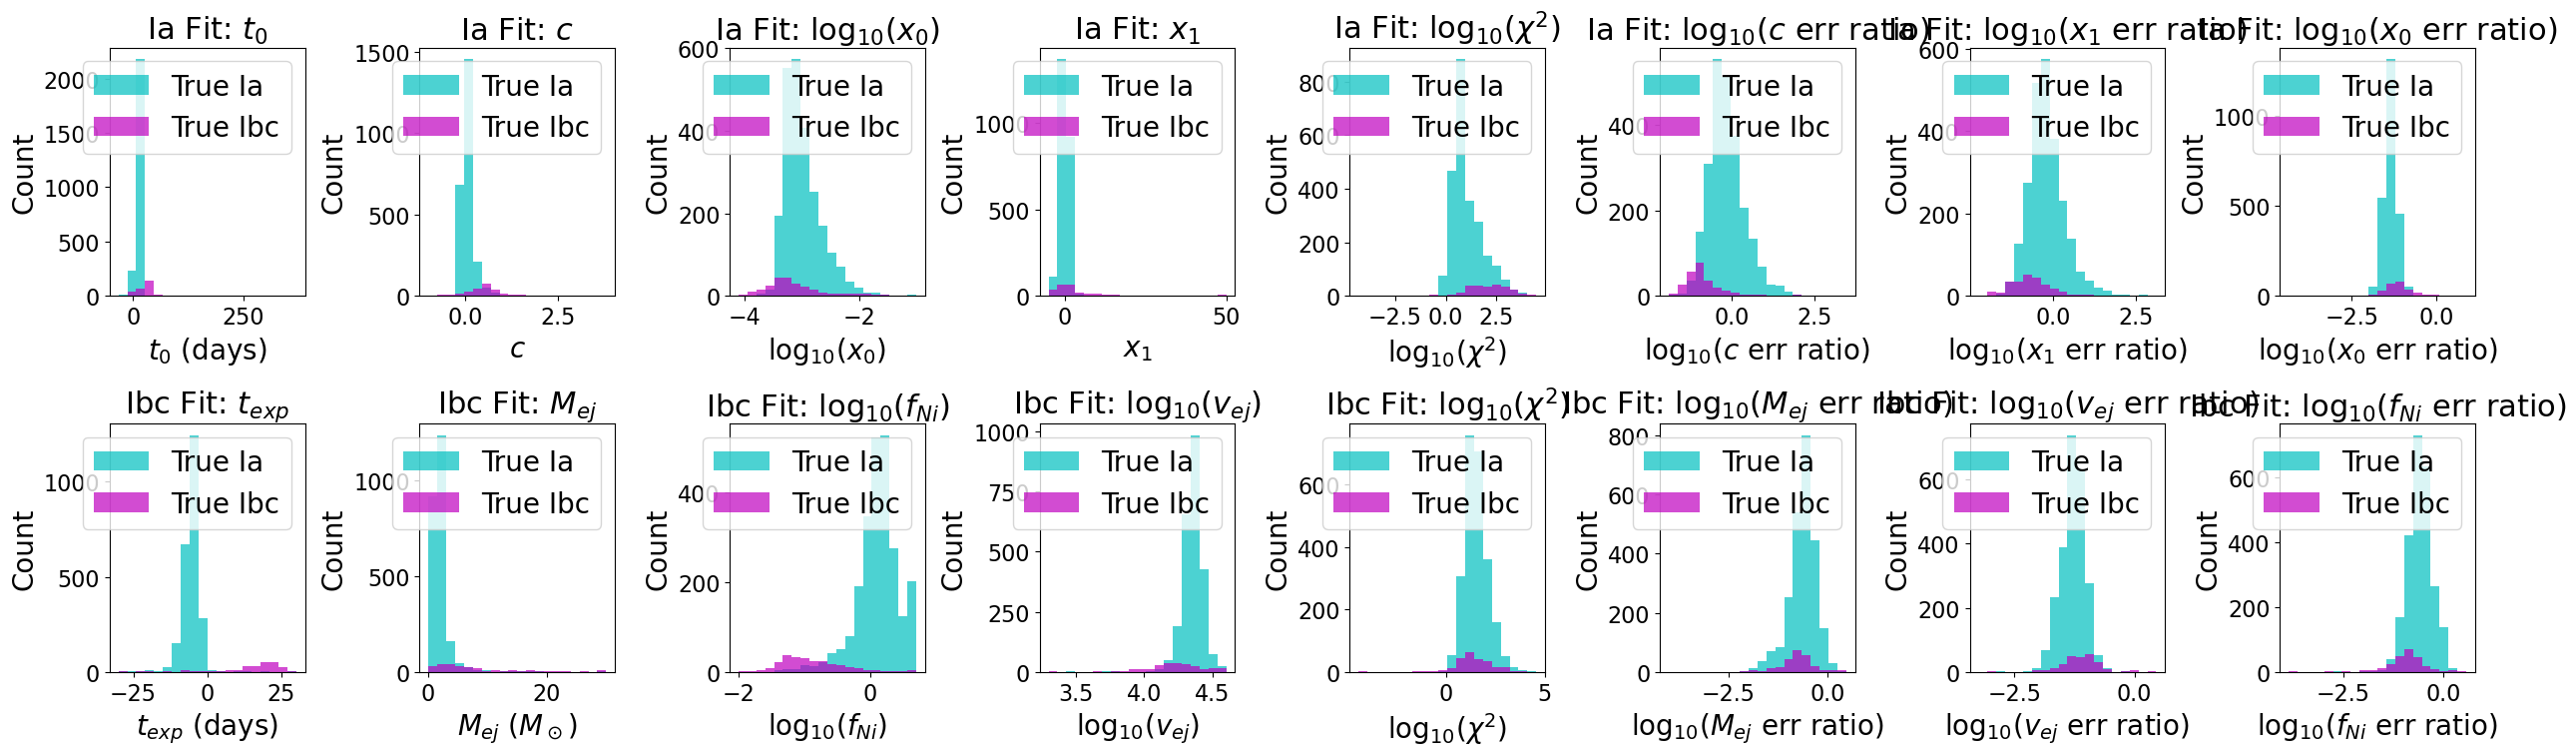

In [267]:
param_labels = {
    't0': r'$t_0$ (days)',
    'log_x0': r'$\log_{10}(x_0)$',
    'log_x1': r'$\log_{10}(x_1)$',
    'x1': r'$x_1$',
    'c': r'$c$',
    'texp': r'$t_{exp}$ (days)',
    'mej': r'$M_{ej}$ ($M_\odot$)',
    'log_fni': r'$\log_{10}(f_{Ni})$',
    'log_vej': r'$\log_{10}(v_{ej})$',
    'log_mej': r'$\log_{10}(M_{ej})$',
    'log_ia_chisq': r'$\log_{10}(\chi^2)$',
    'log_ibc_chisq': r'$\log_{10}(\chi^2)$',
    'fni': r'$\log_{10}(f_{Ni})$',
    'vej': r'$\log_{10}(v_{ej})$',
    'x0': r'$(x_0)$',
    'log_mej_err_ratio': r'$\log_{10}(M_{ej}\ \mathrm{err\ ratio})$',
    'log_vej_err_ratio': r'$\log_{10}(v_{ej}\ \mathrm{err\ ratio})$',
    'log_fni_err_ratio': r'$\log_{10}(f_{Ni}\ \mathrm{err\ ratio})$',
    'log_x0_err_ratio': r'$\log_{10}(x_0\ \mathrm{err\ ratio})$',
    'log_x1_err_ratio': r'$\log_{10}(x_1\ \mathrm{err\ ratio})$',
    'log_c_err_ratio': r'$\log_{10}(c\ \mathrm{err\ ratio})$',
}

param_labels_no_units = {
    't0': r'$t_0$',
    'log_x0': r'$\log_{10}(x_0)$',
    'log_x1': r'$\log_{10}(x_1)$',
    'x1': r'$x_1$',
    'c': r'$c$',
    'texp': r'$t_{exp}$',
    'mej': r'$M_{ej}$',
    'log_fni': r'$\log_{10}(f_{Ni})$',
    'log_vej': r'$\log_{10}(v_{ej})$',
    'log_mej': r'$\log_{10}(M_{ej})$',
    'fni': r'$\log_{10}(f_{Ni})$',
    'vej': r'$\log_{10}(v_{ej})$',
    'log_ia_chisq': r'$\log_{10}(\chi^2)$',
    'log_ibc_chisq': r'$\log_{10}(\chi^2)$',
    'x0': r'$(x_0)$',
    'log_mej_err_ratio': r'$\log_{10}(M_{ej}\ \mathrm{err\ ratio})$',
    'log_vej_err_ratio': r'$\log_{10}(v_{ej}\ \mathrm{err\ ratio})$',
    'log_fni_err_ratio': r'$\log_{10}(f_{Ni}\ \mathrm{err\ ratio})$',
    'log_x0_err_ratio': r'$\log_{10}(x_0\ \mathrm{err\ ratio})$',
    'log_x1_err_ratio': r'$\log_{10}(x_1\ \mathrm{err\ ratio})$',
    'log_c_err_ratio': r'$\log_{10}(c\ \mathrm{err\ ratio})$',
}


labelfontsize = 20
titlefontsize = 22
tickfontsize = 16

fig, axes = plt.subplots(2, 8, figsize=(25, 8))
# fig.suptitle("Histograms of Fitted Parameters for True Ia and Ibc SNe (Colored by True SN Type)")

# Plot Ia fitted parameters
# for i, param in enumerate(ia_param_names[:4]):
for i, param in enumerate(['t0', 'c', 'log_x0', 'x1', 'log_ia_chisq', 'log_c_err_ratio', 
                           'log_x1_err_ratio', 'log_x0_err_ratio']):
    ia_values = [sn.ia_fit[param] for sn in true_ia_sne if sn.ia_fit[param] is not None]
    ibc_values = [sn.ia_fit[param] for sn in true_ibc_sne if sn.ia_fit[param] is not None]
    if param == 'x0':
        ia_values = [np.log10(v) for v in ia_values if v > 0]
        ibc_values = [np.log10(v) for v in ibc_values if v > 0]
    all_values = ia_values + ibc_values
    bins = np.histogram_bin_edges(all_values, bins=20)
    axes[0, i].hist(ia_values, bins=bins, color='c', alpha=0.7, label='True Ia', density=False)
    axes[0, i].hist(ibc_values, bins=bins, color='m', alpha=0.7, label='True Ibc', density=False)
    axes[0, i].set_title(f"Ia Fit: {param_labels_no_units[param]}", fontsize=titlefontsize )
    axes[0, i].set_xlabel(param_labels[param], fontsize = labelfontsize)
    axes[0, i].set_ylabel("Count", fontsize=labelfontsize)
    axes[0, i].tick_params(axis='both', labelsize=tickfontsize)
    axes[0, i].legend(fontsize=labelfontsize)

# Plot Ibc fitted parameters
# for i, param in enumerate(ibc_param_names[:4]):
for i, param in enumerate(['texp', 'mej',  'log_fni', 'log_vej', 'log_ibc_chisq',
    'log_mej_err_ratio', 'log_vej_err_ratio', 'log_fni_err_ratio']):
    ia_values = [sn.ibc_fit[param] for sn in true_ia_sne if sn.ibc_fit[param] is not None]
    ibc_values = [sn.ibc_fit[param] for sn in true_ibc_sne if sn.ibc_fit[param] is not None]
    if param == 'vej' or param == 'fni':
        ia_values = [np.log10(v) for v in ia_values if v > 0]
        ibc_values = [np.log10(v) for v in ibc_values if v > 0]
    all_values = ia_values + ibc_values
    bins = np.histogram_bin_edges(all_values, bins=20)
    axes[1, i].hist(ia_values, bins=bins, color='c', alpha=0.7, label='True Ia', density=False)
    axes[1, i].hist(ibc_values, bins=bins, color='m', alpha=0.7, label='True Ibc', density=False)
    axes[1, i].set_title(f"Ibc Fit: {param_labels_no_units[param]}", fontsize=titlefontsize )
    axes[1, i].set_xlabel(param_labels[param], fontsize = labelfontsize)
    axes[1, i].set_ylabel("Count", fontsize=labelfontsize)
    axes[1, i].tick_params(axis='both', labelsize=tickfontsize)
    axes[1, i].legend(fontsize=labelfontsize)

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

In [268]:
# fig.savefig("figures/fitted_params_histogram.pdf", bbox_inches='tight')

Here we have 8 parameters that we can use to constrain the mixing fraction

In [771]:
# This is the log likelihood function for the distribution of one parameter 
# assuming a mixture of two Gaussians.
# x is the parameter value, samples are the observed data, and alpha is the mixing fraction
def log_likelihood(x, samples, alpha):
    mu1, sigma1, mu2, sigma2 = x
    first_term = alpha * norm.pdf(samples, mu1, sigma1)
    second_term = (1 - alpha) * norm.pdf(samples, mu2, sigma2)
    return np.sum(np.log(first_term + second_term))

In [772]:
def get_param_samples(param_name, sn_sample = all_sne):
    if param_name in ia_param_names:
        return np.array([sn.ia_fit[param_name] for sn in sn_sample])
    elif param_name in ibc_param_names:
        return np.array([sn.ibc_fit[param_name] for sn in sn_sample])
    else:
        raise ValueError(f"Parameter {param_name} not recognized in either Ia or Ibc SNe.")

(array([2.632e+03, 2.700e+01, 8.000e+00, 1.000e+00, 1.000e+00, 0.000e+00,
        1.000e+00, 1.000e+00, 0.000e+00, 3.000e+00]),
 array([7.88257576e-05, 1.00709432e-02, 2.00630606e-02, 3.00551780e-02,
        4.00472955e-02, 5.00394129e-02, 6.00315303e-02, 7.00236477e-02,
        8.00157652e-02, 9.00078826e-02, 1.00000000e-01]),
 <BarContainer object of 10 artists>)

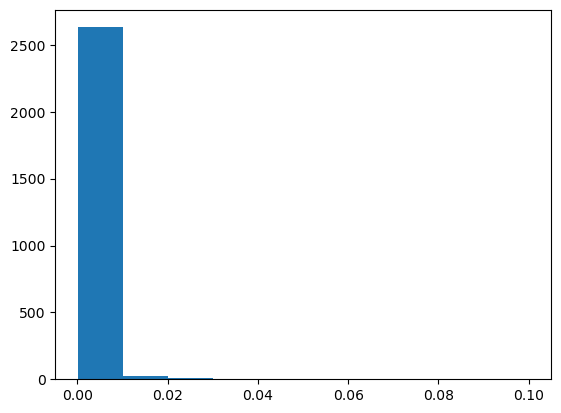

In [773]:
plt.hist(get_param_samples('x0'))

In [774]:
np.shape(get_param_samples('log_vej').reshape(-1, 1))

(2674, 1)

In [888]:
# Fit initial guesses
params_to_use = ['z', 't0', 'c', 'mej', 'texp', 'log_x1', 'log_x0', 'log_fni', 'log_vej', 'x1', 'x0', 'fni', 
                 'log_ia_chisq', 'log_ibc_chisq', 'log_mej_err_ratio', 'log_vej_err_ratio', 'log_fni_err_ratio',
                 'log_x1_err_ratio', 'log_c_err_ratio', 'log_x0_err_ratio']

mus_a = {}
mus_b = {}
sigmas_a = {}
sigmas_b = {}

for param_name in params_to_use:
    # samples = get_param_samples(param_name).reshape(-1, 1)
    # gm = GaussianMixture(n_components=2).fit(samples)
    # mus_a[param_name] = gm.means_[0][0]
    # mus_b[param_name] = gm.means_[1][0]
    # sigmas_a[param_name] = np.sqrt(gm.covariances_[0][0][0])
    # sigmas_b[param_name] = np.sqrt(gm.covariances_[1][0][0])
    # print(param_name, gm.weights_, sigmas_a[param_name], sigmas_b[param_name])
    mus_a[param_name] = np.median(get_param_samples(param_name)) - np.std(get_param_samples(param_name))
    mus_b[param_name] = np.median(get_param_samples(param_name)) + np.std(get_param_samples(param_name))
    sigmas_a[param_name] = np.std(get_param_samples(param_name))
    sigmas_b[param_name] = np.std(get_param_samples(param_name))

In [889]:
def get_hierarchical_weights(weight_param):
    arr = np.array([sn.ia_fit[weight_param] if weight_param in sn.ia_fit else sn.ibc_fit[weight_param] for sn in all_sne])
    order = np.argsort(arr)
    # Create an array of weights that decrease linearly from 1 to 0 based on the sorted order
    # We want the objects with the lowest percent error to have the highest weights
    weights = np.zeros_like(arr, dtype=float)
    n = len(arr)
    for rank, idx in enumerate(order):
        weights[idx] = 1.0 - rank / (n - 1)
    return weights

    # Normalize to a max of 1
    # weights = 1 - (arr - np.min(arr)) / (np.max(arr) - np.min(arr))
    # return 1 - weights  # Invert so that lower values have higher weights
                                         


In [890]:
# np.argsort([sn.ia_fit['x1_err_ratio'] for sn in all_sne]), len(all_sne)

(array([   2.,    0.,    0.,    5.,   14.,  416., 1568.,  573.,   84.,
          12.]),
 array([-4.4305109 , -3.52993581, -2.62936073, -1.72878564, -0.82821056,
         0.07236453,  0.97293961,  1.8735147 ,  2.77408978,  3.67466486,
         4.57523995]),
 <BarContainer object of 10 artists>)

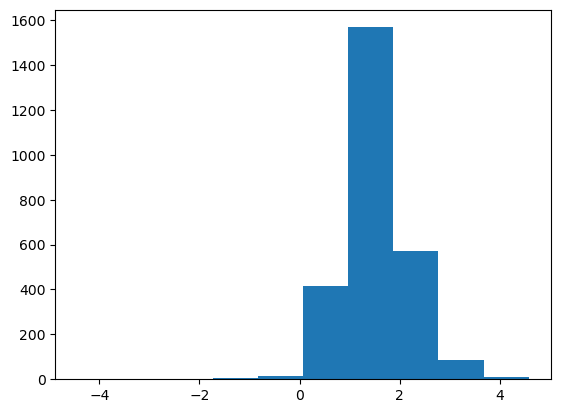

In [891]:
plt.hist(get_param_samples('log_ibc_chisq'))

In [892]:
from collections import defaultdict


num_epochs = 200
lls = np.zeros(num_epochs)

alphas = np.zeros(num_epochs)  # Store alpha values for each epoch
alpha = 0.1  # Mixing fraction
gammas_a = defaultdict(list)
gammas_b = defaultdict(list)


# params_to_use = ['t0', 'c', 'mej', 'texp', 'x1', 'log_x0', 'log_fni', 'log_vej']
params_to_use = ['c', 'mej', 'x1', 'log_x0', 'log_fni', 'log_vej', 
                 'log_ia_chisq', 'log_ibc_chisq', 'log_mej_err_ratio', 'log_vej_err_ratio', 
                 'log_fni_err_ratio', 'log_x0_err_ratio', 
                 'log_x1_err_ratio', 'log_c_err_ratio'
                 ]
# params_to_use = ['c', 'mej', 'log_vej']
# params_to_use = ['c', 'log_c_err_ratio', 'mej']

# params_to_use = list(mus_a.keys())  # Use all parameters for fitting

sigma_clip_masks = {}
for param_name in params_to_use:
    param_samples = get_param_samples(param_name)
    clipped = sigma_clip(param_samples, sigma=10, maxiters=3)
    sigma_clip_masks[param_name] = ~clipped.mask
    # sigma_clip_masks[param_name] = np.ones_like(sigma_clip_masks[param_name])
    print(f"{param_name}: {sum(clipped.mask)} samples clipped")


len(all_sne), len(true_ia_sne)/len(all_sne)

weights = {}
# weights['c'] = get_hierarchical_weights('c_err_ratio')
# weights['mej'] = get_hierarchical_weights('mej_err_ratio')
# weights['x1'] = get_hierarchical_weights('x1_err_ratio')
# weights['log_x0'] = get_hierarchical_weights('log_x0_err_ratio')
# weights['log_fni'] = get_hierarchical_weights('fni_err_ratio')
# weights['log_vej'] = get_hierarchical_weights('log_vej_err_ratio')
# weights['log_ia_chisq'] = np.ones(len(all_sne))
# weights['log_ibc_chisq'] = np.ones(len(all_sne))
for param_name in params_to_use:
    weights[param_name] = np.ones(len(all_sne))

# Normalize weights for each parameter to a max of 1
for param_name in params_to_use:
    weights[param_name] /= np.max(weights[param_name])

# there are two populations, a and b
for epoch in range(num_epochs):
    # for param_name in list(mus_a.keys())[:3]:
    for param_name in params_to_use:
        param_samples = get_param_samples(param_name)
        mask = sigma_clip_masks[param_name]
        param_samples = param_samples[mask]
        these_weights = weights[param_name][mask]

        # the gammas are weights for every sample
        gammas_a[param_name] = alpha * norm.pdf(param_samples, mus_a[param_name], sigmas_a[param_name])
        gammas_b[param_name] = (1 - alpha) * norm.pdf(param_samples, mus_b[param_name], sigmas_b[param_name])
        
        # print(param_name)
        # print(np.sum(gammas_a[param_name]), np.sum(gammas_b[param_name]))
        # print(sum(np.isnan(gammas_a[param_name])), sum(np.isinf(gammas_a[param_name])))

        # Normalize over parameter
        gamma_total = (gammas_a[param_name] + gammas_b[param_name])
        gammas_a[param_name] /= gamma_total
        gammas_b[param_name] /= gamma_total
        

        # mus_a[param_name] = np.sum(gammas_a[param_name] * param_samples) / np.sum(gammas_a[param_name])
        # mus_b[param_name] = np.sum(gammas_b[param_name] * param_samples) / np.sum(gammas_b[param_name])
        # sigmas_a[param_name] = np.sqrt(np.sum(gammas_a[param_name] * (param_samples - mus_a[param_name])**2) / np.sum(gammas_a[param_name]))
        # sigmas_b[param_name] = np.sqrt(np.sum(gammas_b[param_name] * (param_samples - mus_b[param_name])**2) / np.sum(gammas_b[param_name]))


        mus_a[param_name] = np.sum(these_weights * gammas_a[param_name] * param_samples) / np.sum(these_weights * gammas_a[param_name])
        mus_b[param_name] = np.sum(these_weights * gammas_b[param_name] * param_samples) / np.sum(these_weights * gammas_b[param_name])
        sigmas_a[param_name] = np.sqrt(np.sum(these_weights * gammas_a[param_name] * (param_samples - mus_a[param_name])**2) / np.sum(these_weights * gammas_a[param_name]))
        sigmas_b[param_name] = np.sqrt(np.sum(these_weights * gammas_b[param_name] * (param_samples - mus_b[param_name])**2) / np.sum(these_weights * gammas_b[param_name]))

        if sigmas_a[param_name] < 0.001:
            sigmas_a[param_name] = 0.001
        if sigmas_b[param_name] < 0.001:
            sigmas_b[param_name] = 0.001
    
    # Here we can use information from all parameters to constrain the mixing fraction
    # alpha is the fraction of parameter a, parameter b has 1 - alpha
    alpha = np.mean(np.concatenate([gammas_a[param_name] for param_name in params_to_use]))
    alphas[epoch] = alpha
    print("Alpha", alpha)

    # Calculate log likelihood for the current epoch
    for param_name in params_to_use:
        lls[epoch] += log_likelihood([mus_a[param_name], sigmas_a[param_name], mus_b[param_name], sigmas_b[param_name]], 
                                     get_param_samples(param_name)[sigma_clip_masks[param_name]], alpha)

print(lls[-1])
for param_name in params_to_use:
    param_samples = get_param_samples(param_name)
    gammas_a[param_name] = alpha * norm.pdf(param_samples, mus_a[param_name], sigmas_a[param_name])
    gammas_b[param_name] = (1 - alpha) * norm.pdf(param_samples, mus_b[param_name], sigmas_b[param_name])
    gamma_total = (gammas_a[param_name] + gammas_b[param_name])
    gammas_a[param_name] /= gamma_total
    gammas_b[param_name] /= gamma_total
    

c: 1 samples clipped
mej: 0 samples clipped
x1: 20 samples clipped
log_x0: 0 samples clipped
log_fni: 0 samples clipped
log_vej: 0 samples clipped
log_ia_chisq: 0 samples clipped
log_ibc_chisq: 0 samples clipped
log_mej_err_ratio: 0 samples clipped
log_vej_err_ratio: 0 samples clipped
log_fni_err_ratio: 0 samples clipped
log_x0_err_ratio: 2 samples clipped
log_x1_err_ratio: 0 samples clipped
log_c_err_ratio: 0 samples clipped
Alpha 0.16486203325191115
Alpha 0.17921241056726975
Alpha 0.2025887998841586
Alpha 0.22998134682112073
Alpha 0.25874010320708685
Alpha 0.28718604927301905
Alpha 0.3144130344265583
Alpha 0.3401422393765155
Alpha 0.3643982080535454
Alpha 0.38720366357613145
Alpha 0.40855907734787933
Alpha 0.4284871852092571
Alpha 0.4470450460853099
Alpha 0.46431300671515174
Alpha 0.48038081904055663
Alpha 0.495338127254543
Alpha 0.5092693551571741
Alpha 0.5222514428854799
Alpha 0.5343531816194989
Alpha 0.5456354566988602
Alpha 0.5561520720891385
Alpha 0.565950916867977
Alpha 0.57507

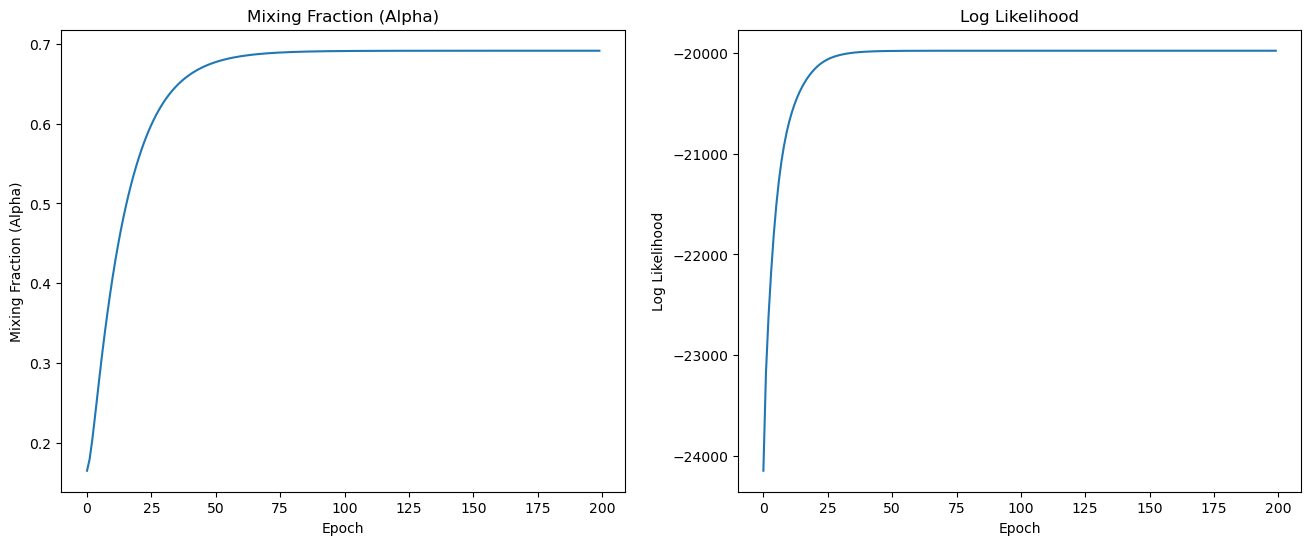

In [893]:
fig, ax = plt.subplots(1,2, figsize=(16, 6))
ax[0].plot(alphas)
ax[1].plot(lls)
ax[0].set_xlabel("Epoch")
ax[0].set_ylabel("Mixing Fraction (Alpha)")
ax[0].set_title("Mixing Fraction (Alpha)")
ax[1].set_xlabel("Epoch")
ax[1].set_ylabel("Log Likelihood")
ax[1].set_title("Log Likelihood")

plt.show()

In [894]:
prob_a = np.ones(len(all_sne))

for i in range(len(all_sne)):
    s = 0
    b = 0
    for param in params_to_use:
        s += gammas_a[param][i]
        b += gammas_b[param][i]
    prob_a[i] = s / (s + b)

(array([  7.,  21.,  32., 102., 290., 689., 887., 442., 181.,  23.]),
 array([0.39149314, 0.44033326, 0.48917338, 0.53801349, 0.58685361,
        0.63569373, 0.68453384, 0.73337396, 0.78221408, 0.83105419,
        0.87989431]),
 <BarContainer object of 10 artists>)

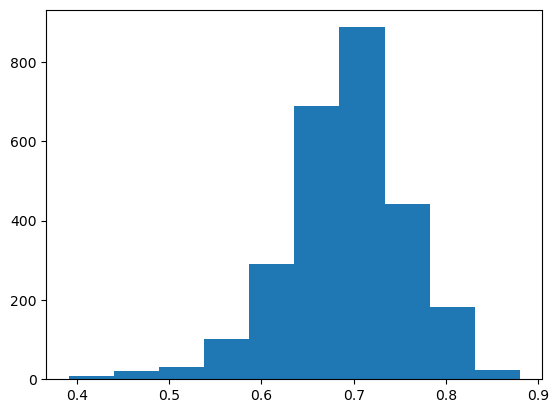

In [895]:
plt.hist(prob_a)

In [896]:
classifications = ['SN Ia' if p >= 0.5 else 'SN Ibc' for p in prob_a]
true_classes = ['SN Ia' if sn.true_class == 'SN Ia' else 'SN Ibc' for sn in all_sne]

# true_classes

2418 27 4 225
0.9143605086013463


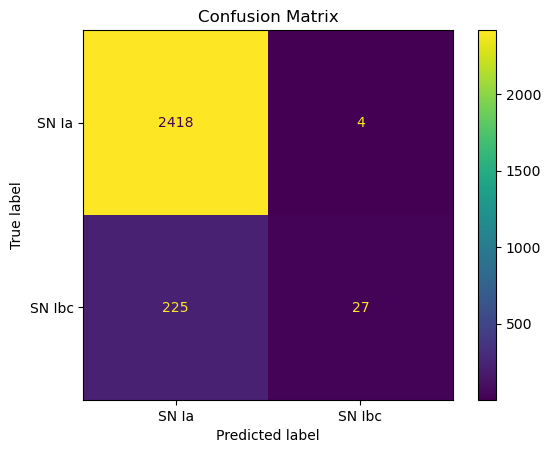

Ia accuracy: 0.9983484723369116
Ibc accuracy: 0.10714285714285714


In [897]:
num_correct_ia = 0
num_correct_ibc = 0
num_wrong_true_ia = 0
num_wrong_true_ibc = 0


for a,b in zip(true_classes, classifications):
    if a == 'SN Ia':
        if b == 'SN Ia':
            num_correct_ia += 1
        else:
            num_wrong_true_ia += 1
    else:
        if b == 'SN Ibc':
            num_correct_ibc += 1
        else:
            num_wrong_true_ibc += 1

print(num_correct_ia, num_correct_ibc, num_wrong_true_ia, num_wrong_true_ibc)
print((num_correct_ia + num_correct_ibc) / len(all_sne))

cm = confusion_matrix(true_classes, classifications, labels=['SN Ia', 'SN Ibc'])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['SN Ia', 'SN Ibc'])
disp.plot()
plt.title("Confusion Matrix")
plt.show()

print("Ia accuracy:", (num_correct_ia) / (num_correct_ia + num_wrong_true_ia))
print("Ibc accuracy:", (num_correct_ibc) / (num_correct_ibc + num_wrong_true_ibc))

In [898]:
classifications_rough = np.ones(len(all_sne))
for i in range(len(all_sne)):
    probs = np.array([gammas_a[param][i] for param in params_to_use])
    num_a = sum(probs >= 0.5)
    if num_a >=4:
        classifications_rough[i] = 0
classifications_rough = ['SN Ia' if i == 0 else 'SN Ibc' for i in classifications_rough]


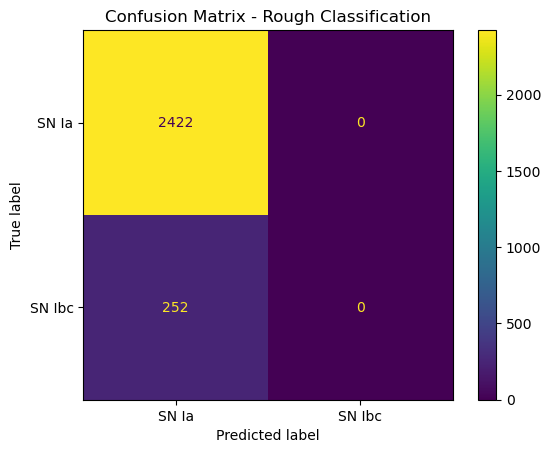

2422 0 0 252
0.9057591623036649


In [899]:
num_correct_ia = 0
num_correct_ibc = 0
num_wrong_true_ia = 0
num_wrong_true_ibc = 0


for a,b in zip(true_classes, classifications_rough):
    if a == 'SN Ia':
        if b == 'SN Ia':
            num_correct_ia += 1
        else:
            num_wrong_true_ia += 1
    else:
        if b == 'SN Ibc':
            num_correct_ibc += 1
        else:
            num_wrong_true_ibc += 1

cm = confusion_matrix(true_classes, classifications_rough, labels=['SN Ia', 'SN Ibc'])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['SN Ia', 'SN Ibc'])
disp.plot()
plt.title("Confusion Matrix - Rough Classification")
plt.show()

print(num_correct_ia, num_correct_ibc, num_wrong_true_ia, num_wrong_true_ibc)
print((num_correct_ia + num_correct_ibc) / len(all_sne))

In [900]:
params_to_use

['c',
 'mej',
 'x1',
 'log_x0',
 'log_fni',
 'log_vej',
 'log_ia_chisq',
 'log_ibc_chisq',
 'log_mej_err_ratio',
 'log_vej_err_ratio',
 'log_fni_err_ratio',
 'log_x0_err_ratio',
 'log_x1_err_ratio',
 'log_c_err_ratio']

{'c': 0.7737735049705751, 'mej': 0.7758590336018869, 'x1': 1.3300211616248618, 'log_x0': 1.1759205762184493, 'log_fni': 0.11857453790539964, 'log_vej': 0.16987869961872532, 'log_ia_chisq': 0.5969059363099795, 'log_ibc_chisq': 0.41353624586189186, 'log_mej_err_ratio': 0.31450771961847807, 'log_vej_err_ratio': 0.6882769223812918, 'log_fni_err_ratio': 0.9520650879611031, 'log_x0_err_ratio': 2.608854213518574, 'log_x1_err_ratio': 2.5380651102377283, 'log_c_err_ratio': 2.8559229828396444}
2404 62 18 190
0.9222139117427075


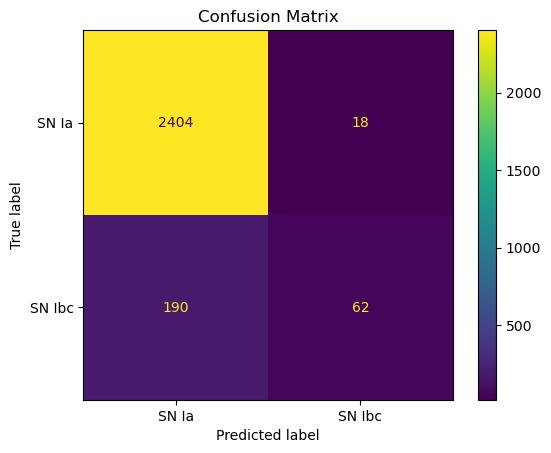

Ia accuracy: 0.9925681255161024
Ibc accuracy: 0.24603174603174602


In [901]:
from scipy.stats import entropy
from scipy.special import kl_div

param_weights = {}
for param in params_to_use:
    # ia_vals = [sn.ia_fit[param] if param in ia_param_names else sn.ibc_fit[param] 
    #            for sn in true_ia_sne]
    # ibc_vals = [sn.ia_fit[param] if param in ia_param_names else sn.ibc_fit[param] 
    #             for sn in true_ibc_sne]
    
    # # Use histogram-based KL divergence as weight
    # bins = np.histogram_bin_edges(ia_vals + ibc_vals, bins=30)
    # p_ia, _ = np.histogram(ia_vals, bins=bins, density=True)
    # p_ibc, _ = np.histogram(ibc_vals, bins=bins, density=True)
    # p_ia = p_ia + 1e-100  # avoid zeros
    # p_ibc = p_ibc + 1e-100
    # param_weights[param] = entropy(p_ia, p_ibc)
    param_weights[param] = 1 / entropy(gammas_a[param], gammas_b[param])
    # param_weights[param] = 1 / kl_div(gammas_a[param], gammas_b[param]).sum()
    # print(param_weights[param], param_weights[param].sum())


# Then in classification:
weighted_probs = np.zeros(len(all_sne))
for i in range(len(all_sne)):
    weighted_probs[i] = sum(param_weights[p] * gammas_a[p][i] for p in params_to_use) / \
                sum(param_weights[p] * (gammas_a[p][i] + gammas_b[p][i]) for p in params_to_use)

print(param_weights)

# Classify SNe based on weighted probabilities
weighted_classifications = ['SN Ia' if p >= 0.5 else 'SN Ibc' for p in weighted_probs]
num_correct_ia = 0
num_correct_ibc = 0
num_wrong_true_ia = 0
num_wrong_true_ibc = 0


for a,b in zip(true_classes, weighted_classifications):
    if a == 'SN Ia':
        if b == 'SN Ia':
            num_correct_ia += 1
        else:
            num_wrong_true_ia += 1
    else:
        if b == 'SN Ibc':
            num_correct_ibc += 1
        else:
            num_wrong_true_ibc += 1

print(num_correct_ia, num_correct_ibc, num_wrong_true_ia, num_wrong_true_ibc)
print((num_correct_ia + num_correct_ibc) / len(all_sne))

cm = confusion_matrix(true_classes, weighted_classifications, labels=['SN Ia', 'SN Ibc'])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['SN Ia', 'SN Ibc'])
disp.plot()
plt.title("Confusion Matrix")
plt.show()

print("Ia accuracy:", (num_correct_ia) / (num_correct_ia + num_wrong_true_ia))
print("Ibc accuracy:", (num_correct_ibc) / (num_correct_ibc + num_wrong_true_ibc))

In [902]:
# for n in sigmas_b.keys():
#     if sigmas_b[n] <= 0.01:
#         sigmas_b[n] = 0.01

# for n in sigmas_a.keys():
#     if sigmas_a[n] <= 0.01:
#         sigmas_a[n] = 0.01

In [903]:
# sigmas_a['x0'] = 1e-5
# sigmas_b['x0'] = 1e-6

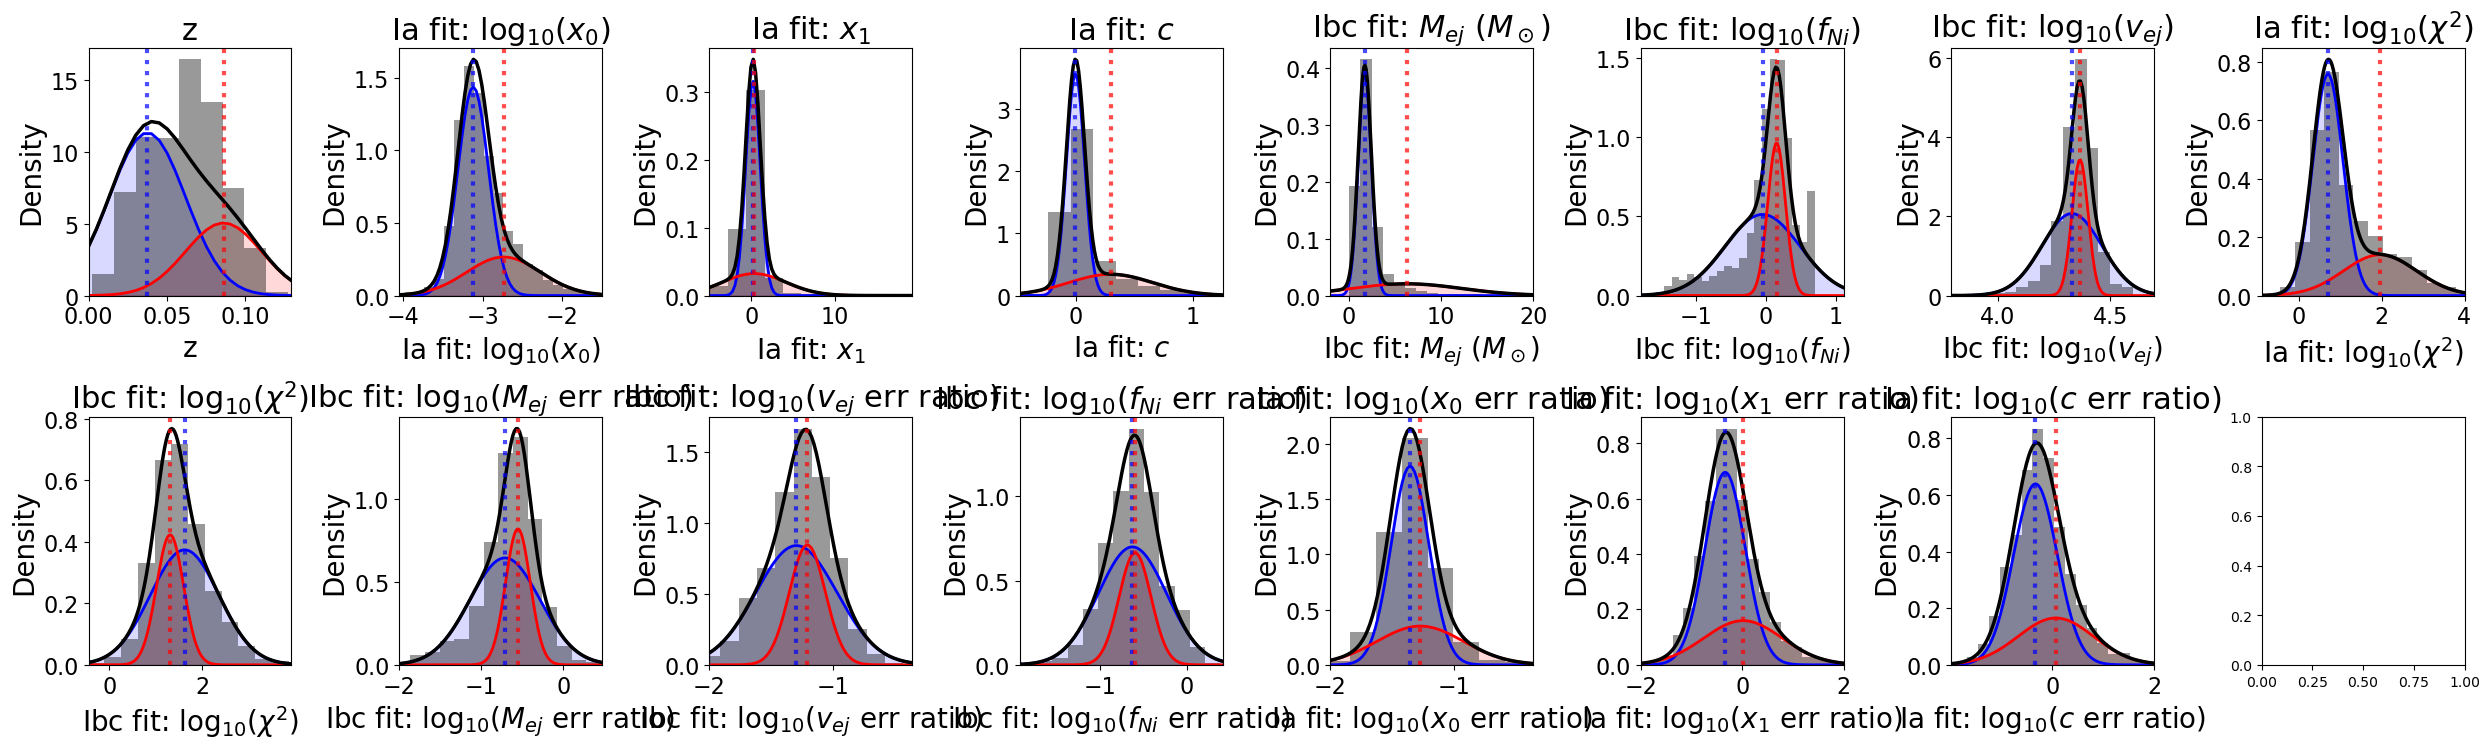


Fitted Gaussian Mixture Parameters:
----------------------------------------------------------------------
Parameter           μ_A        σ_A        μ_B        σ_B
----------------------------------------------------------------------
z                0.0377     0.0243     0.0863     0.0243
log_x0          -3.1177     0.1920    -2.7363     0.4635
x1               0.2135     0.8733     0.3599     3.8021
c               -0.0011     0.0774     0.2995     0.3599
mej              1.7360     0.7077     6.2626     5.9487
log_fni         -0.0487     0.5394     0.1533     0.1277
log_vej          4.3289     0.1334     4.3649     0.0359
log_ia_chisq     0.7053     0.3647     1.9624     0.8822
log_ibc_chisq     1.6187     0.7376     1.3073     0.2909
log_mej_err_ratio    -0.7087     0.4288    -0.5511     0.1504
log_vej_err_ratio    -1.2970     0.3279    -1.2089     0.1455
log_fni_err_ratio    -0.6296     0.3937    -0.5991     0.1849
log_x0_err_ratio    -1.3543     0.1533    -1.2716     0.3507
log

In [904]:
# Define x ranges for plotting
x_ranges = {
    'z': np.linspace(0, 1, 200),
    't0': np.linspace(-50, 100, 200),
    'log_x0': np.linspace(-6, 1, 200),
    'x1': np.linspace(-5, 50, 200),
    'c': np.linspace(-1, 2, 200),
    'texp': np.linspace(-20, 50, 200),
    'mej': np.linspace(-2, 20, 200),
    'log_fni': np.linspace(-3, 2, 200),
    'fni': np.linspace(0, 3, 200),
    'log_vej': np.linspace(3.5, 5, 200),
    'log_x1': np.linspace(-2, 2, 200),
    'log_mej': np.linspace(-1, 2, 200),
    'log_ia_chisq': np.linspace(-2, 4, 200),
    'log_ibc_chisq': np.linspace(-2, 4, 200),
    'log_mej_err_ratio': np.linspace(-2, 2, 200),
    'log_vej_err_ratio': np.linspace(-2, 2, 200),
    'log_fni_err_ratio': np.linspace(-2, 2, 200),
    'log_x0_err_ratio': np.linspace(-2, 2, 200),
    'log_x1_err_ratio': np.linspace(-2, 2, 200),
    'log_c_err_ratio': np.linspace(-2, 2, 200),
}

# Parameter display names
param_labels = {
    'z': r'z',
    't0': r'Ia fit: $t_0$ (days)',
    'log_x0': r'Ia fit: $\log_{10}(x_0)$',
    'log_x1': r'Ia fit: $\log_{10}(x_1 + 5)$',
    'x1': r'Ia fit: $x_1$',
    'c': r'Ia fit: $c$',
    'texp': r'Ibc fit: $t_{exp}$ (days)',
    'mej': r'Ibc fit: $M_{ej}$ ($M_\odot$)',
    'log_fni': r'Ibc fit: $\log_{10}(f_{Ni})$',
    'fni': r'Ibc fit: $f_{Ni}$',
    'log_vej': r'Ibc fit: $\log_{10}(v_{ej})$',
    'log_mej': r'Ibc fit: $\log_{10}(M_{ej})$',
    'log_ia_chisq': r'Ia fit: $\log_{10}(\chi^2)$',
    'log_ibc_chisq': r'Ibc fit: $\log_{10}(\chi^2)$',
    'log_mej_err_ratio': r'Ibc fit: $\log_{10}(M_{ej}\ \mathrm{err\ ratio})$',
    'log_vej_err_ratio': r'Ibc fit: $\log_{10}(v_{ej}\ \mathrm{err\ ratio})$',
    'log_fni_err_ratio': r'Ibc fit: $\log_{10}(f_{Ni}\ \mathrm{err\ ratio})$',
    'log_x0_err_ratio': r'Ia fit: $\log_{10}(x_0\ \mathrm{err\ ratio})$',
    'log_x1_err_ratio': r'Ia fit: $\log_{10}(x_1\ \mathrm{err\ ratio})$',
    'log_c_err_ratio': r'Ia fit: $\log_{10}(c\ \mathrm{err\ ratio})$',
}

# Create figure with better styling
# fig.suptitle(f"Gaussian Mixture Model Fits (Mixing Fraction α = {alpha:.3f})", fontsize=14, fontweight='bold')

# params_plot = ['t0', 'log_x0', 'x1', 'c', 'texp', 'mej', 'log_fni', 'log_vej']
params_plot = ['z', 'log_x0', 'x1', 'c', 
               'mej', 'log_fni', 'log_vej', 
               'log_ia_chisq', 'log_ibc_chisq', 'log_mej_err_ratio', 'log_vej_err_ratio',
               'log_fni_err_ratio', 'log_x0_err_ratio', 'log_x1_err_ratio', 'log_c_err_ratio'
               ]
# params_plot = ['c', 'mej']

fig, axes = plt.subplots(2, len(params_plot) // 2 + 1, figsize=(25, 8))


for idx, param in enumerate(params_plot):
    ax = axes.flat[idx]
    
    # Get samples and set up parameters
    samples = get_param_samples(param)
    mu_a, mu_b = mus_a[param], mus_b[param]
    sigma_a, sigma_b = sigmas_a[param], sigmas_b[param]

    x = x_ranges[param]
    
    # Plot histogram with better styling
    n, bins, patches = ax.hist(samples, bins=25, density=True,  alpha=0.4,
                                color='black', linewidth=0.5,
                                label='Data')
    
    # Compute mixture components
    y_a = alpha * norm.pdf(x, mu_a, sigma_a)
    y_b = (1 - alpha) * norm.pdf(x, mu_b, sigma_b)
    y_mix = y_a + y_b
    
    # Plot components with better styling
    ax.plot(x, y_a, 'b-', linewidth=2, label=f'Component A (α={alpha:.2f})')
    ax.plot(x, y_b, 'r-', linewidth=2, label=f'Component B (1-α={1-alpha:.2f})')
    ax.plot(x, y_mix, 'k-', linewidth=2.5, label='Mixture')
    
    # Fill under curves for visibility
    ax.fill_between(x, y_a, alpha=0.15, color='blue')
    ax.fill_between(x, y_b, alpha=0.15, color='red')
    
    # Set axis limits based on data
    data_min, data_max = np.percentile(samples, [1, 99])
    x_margin = (data_max - data_min) * 0.2
    ax.set_xlim(max(x[0], data_min - x_margin), min(x[-1], data_max + x_margin))
    
    # Styling
    ax.set_xlabel(param_labels[param], fontsize=labelfontsize)
    ax.set_ylabel('Density', fontsize=labelfontsize)
    ax.set_title(param_labels[param], fontsize=titlefontsize)
    # ax.legend(fontsize=labelfontsize, loc='upper right')
    ax.tick_params(axis='both', labelsize=tickfontsize)

    
    # Add mean markers
    ax.axvline(mu_a, color='blue', linestyle=':', alpha=0.7, linewidth=3)
    ax.axvline(mu_b, color='red', linestyle=':', alpha=0.7, linewidth=3)

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

fig.savefig("figures/gmm_results.pdf", bbox_inches='tight')

# Print summary statistics
print("\nFitted Gaussian Mixture Parameters:")
print("-" * 70)
print(f"{'Parameter':<12} {'μ_A':>10} {'σ_A':>10} {'μ_B':>10} {'σ_B':>10}")
print("-" * 70)
for param in params_plot:
        print(f"{param:<12} {mus_a[param]:>10.4f} {sigmas_a[param]:>10.4f} {mus_b[param]:>10.4f} {sigmas_b[param]:>10.4f}")

In [935]:
params_to_use = ['log_vej', 'log_fni', 'mej']


In [936]:
def fit_gmm(sn_sample = all_sne, initial_alpha = 0.5, verbose = False):

    mus_a = {}
    mus_b = {}
    sigmas_a = {}
    sigmas_b = {}

    # params_to_use = ['c', 'mej', 'x1', 'log_x0', 'log_fni', 'log_vej', 
    #                  'log_ia_chisq', 'log_ibc_chisq', 'log_mej_err_ratio', 'log_vej_err_ratio', 
    #                  'log_fni_err_ratio', 'log_x0_err_ratio', 
    #                  'log_x1_err_ratio', 'log_c_err_ratio']

    # params_to_use = ['c', 'mej']
    print(len(sn_sample))

    # Initialize parameters (median ± std)
    for param_name in params_to_use:
        mus_a[param_name] = np.median(get_param_samples(param_name, sn_sample)) - np.std(get_param_samples(param_name, sn_sample))
        mus_b[param_name] = np.median(get_param_samples(param_name, sn_sample)) + np.std(get_param_samples(param_name, sn_sample))
        sigmas_a[param_name] = np.std(get_param_samples(param_name, sn_sample))
        sigmas_b[param_name] = np.std(get_param_samples(param_name, sn_sample))

    num_epochs = 200
    lls = np.zeros(num_epochs)

    alphas = np.zeros(num_epochs)
    alpha = initial_alpha
    gammas_a = defaultdict(list)
    gammas_b = defaultdict(list)

    # Pre-compute sigma clip masks per parameter
    sigma_clip_masks = {}
    for param_name in params_to_use:
        param_samples = get_param_samples(param_name, sn_sample)
        clipped = sigma_clip(param_samples, sigma=10, maxiters=3)
        sigma_clip_masks[param_name] = ~clipped.mask

    # Uniform weights
    weights = {}
    for param_name in params_to_use:
        weights[param_name] = np.ones(len(sn_sample))

    # EM iterations
    for epoch in range(num_epochs):
        for param_name in params_to_use:
            param_samples = get_param_samples(param_name, sn_sample)
            mask = sigma_clip_masks[param_name]
            param_samples = param_samples[mask]
            these_weights = weights[param_name][mask]

            # E-step
            gammas_a[param_name] = alpha * norm.pdf(param_samples, mus_a[param_name], sigmas_a[param_name])
            gammas_b[param_name] = (1 - alpha) * norm.pdf(param_samples, mus_b[param_name], sigmas_b[param_name])

            gamma_total = (gammas_a[param_name] + gammas_b[param_name])
            gammas_a[param_name] /= gamma_total
            gammas_b[param_name] /= gamma_total

            # M-step with weights
            mus_a[param_name] = np.sum(these_weights * gammas_a[param_name] * param_samples) / np.sum(these_weights * gammas_a[param_name])
            mus_b[param_name] = np.sum(these_weights * gammas_b[param_name] * param_samples) / np.sum(these_weights * gammas_b[param_name])
            sigmas_a[param_name] = np.sqrt(np.sum(these_weights * gammas_a[param_name] * (param_samples - mus_a[param_name])**2) / np.sum(these_weights * gammas_a[param_name]))
            sigmas_b[param_name] = np.sqrt(np.sum(these_weights * gammas_b[param_name] * (param_samples - mus_b[param_name])**2) / np.sum(these_weights * gammas_b[param_name]))

            if sigmas_a[param_name] < 0.001:
                sigmas_a[param_name] = 0.001
            if sigmas_b[param_name] < 0.001:
                sigmas_b[param_name] = 0.001

        alpha = np.mean(np.concatenate([gammas_a[param_name] for param_name in params_to_use]))
        alphas[epoch] = alpha
        if verbose:
            print("Alpha", alpha)

        # Log likelihood on clipped samples
        for param_name in params_to_use:
            mask = sigma_clip_masks[param_name]
            lls[epoch] += log_likelihood([mus_a[param_name], sigmas_a[param_name], mus_b[param_name], sigmas_b[param_name]],
                                         get_param_samples(param_name, sn_sample)[mask], alpha)

    fit_params = mus_a, mus_b, sigmas_a, sigmas_b

    # Recompute gammas on ALL samples for classification
    for param_name in params_to_use:
        param_samples = get_param_samples(param_name, sn_sample)
        gammas_a[param_name] = alpha * norm.pdf(param_samples, mus_a[param_name], sigmas_a[param_name])
        gammas_b[param_name] = (1 - alpha) * norm.pdf(param_samples, mus_b[param_name], sigmas_b[param_name])
        gamma_total = (gammas_a[param_name] + gammas_b[param_name])
        gammas_a[param_name] /= gamma_total
        gammas_b[param_name] /= gamma_total

    return alpha, lls[-1], gammas_a, gammas_b, fit_params

In [937]:
def classify_sample(sn_sample, gammas_a, gammas_b):

    prob_a = np.ones(len(sn_sample))

    print(params_to_use)
    for i in range(len(sn_sample)):
        s = 0
        b = 0
        for param in params_to_use:
            s += gammas_a[param][i]
            b += gammas_b[param][i]
        prob_a[i] = s / (s + b)

    classifications = ['SN Ia' if p >= 0.5 else 'SN Ibc' for p in prob_a]
    true_classes = ['SN Ia' if sn.true_class == 'SN Ia' else 'SN Ibc' for sn in sn_sample]

    # Calculate accuracy
    num_correct_ia = 0
    num_correct_ibc = 0
    num_wrong_true_ia = 0
    num_wrong_true_ibc = 0

    for a,b in zip(true_classes, classifications):
        if a == 'SN Ia':
            if b == 'SN Ia':
                num_correct_ia += 1
            else:
                num_wrong_true_ia += 1
        else:
            if b == 'SN Ibc':
                num_correct_ibc += 1
            else:
                num_wrong_true_ibc += 1

    accuracy = (num_correct_ia + num_correct_ibc) / len(sn_sample)
    ia_accuracy = num_correct_ia / (num_correct_ia + num_wrong_true_ia)
    ibc_accuracy = num_correct_ibc / (num_correct_ibc + num_wrong_true_ibc)
    if accuracy < 0.5:
        accuracy = 1 - accuracy
        ia_accuracy = 1 - ia_accuracy
        ibc_accuracy = 1 - ibc_accuracy
    return accuracy, ia_accuracy, ibc_accuracy

In [938]:
def classify_sample_entropy(sn_sample, gammas_a, gammas_b):
    param_weights = {}
    for param in params_to_use:
        param_weights[param] = 1 / entropy(gammas_a[param], gammas_b[param])

    # Then in classification:
    weighted_probs = np.zeros(len(sn_sample))
    for i in range(len(sn_sample)):
        weighted_probs[i] = sum(param_weights[p] * gammas_a[p][i] for p in params_to_use) / \
                    sum(param_weights[p] * (gammas_a[p][i] + gammas_b[p][i]) for p in params_to_use)

    print(param_weights)

    # Classify SNe based on weighted probabilities
    weighted_classifications = ['SN Ia' if p >= 0.5 else 'SN Ibc' for p in weighted_probs]
    true_classes = ['SN Ia' if sn.true_class == 'SN Ia' else 'SN Ibc' for sn in sn_sample]

    num_correct_ia = 0
    num_correct_ibc = 0
    num_wrong_true_ia = 0
    num_wrong_true_ibc = 0


    for a,b in zip(true_classes, weighted_classifications):
        if a == 'SN Ia':
            if b == 'SN Ia':
                num_correct_ia += 1
            else:
                num_wrong_true_ia += 1
        else:
            if b == 'SN Ibc':
                num_correct_ibc += 1
            else:
                num_wrong_true_ibc += 1

    accuracy = (num_correct_ia + num_correct_ibc) / len(sn_sample)
    ia_accuracy = num_correct_ia / (num_correct_ia + num_wrong_true_ia)
    ibc_accuracy = num_correct_ibc / (num_correct_ibc + num_wrong_true_ibc)
    # if accuracy < 0.5:
    #     accuracy = 1 - accuracy
    #     ia_accuracy = 1 - ia_accuracy
    #     ibc_accuracy = 1 - ibc_accuracy
    
    return accuracy, ia_accuracy, ibc_accuracy

In [939]:
# fit_gmm(sn_sample = all_sne, initial_alpha = 0.6)
# for i in range(1,10):
#     print(f"Initial alpha: {i/10}")
#     final_alpha, final_ll, final_gammas_a, final_gammas_b, _ = fit_gmm(sn_sample = all_sne, initial_alpha = i/10)
#     print(f"Final alpha: {final_alpha}", f"Final log likelihood: {final_ll}")
#     print("Classification accuracy:", classify_sample(all_sne, final_gammas_a, final_gammas_b)[0])


In [940]:
len(true_ia_sne), len(true_ibc_sne)

(2422, 252)

2673
['log_vej', 'log_fni', 'mej']
2423
['log_vej', 'log_fni', 'mej']
2173
['log_vej', 'log_fni', 'mej']
1923
['log_vej', 'log_fni', 'mej']
1673
['log_vej', 'log_fni', 'mej']
1423
['log_vej', 'log_fni', 'mej']
1173
['log_vej', 'log_fni', 'mej']
923
['log_vej', 'log_fni', 'mej']
673
['log_vej', 'log_fni', 'mej']
423
['log_vej', 'log_fni', 'mej']


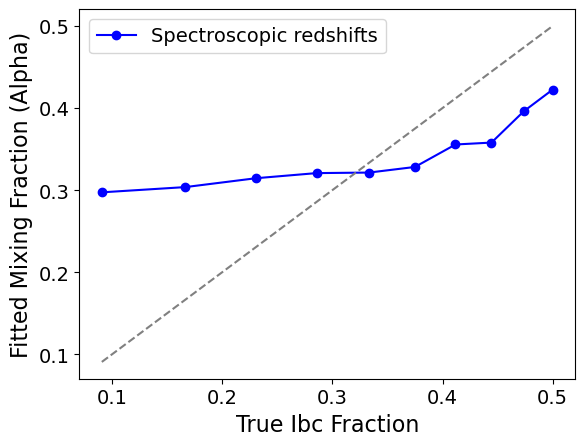

In [941]:
ratios = [(25 * (i + 1))/ (25 * (i + 1) + 250) for i in range(10)]


def mixing_fraction_analysis(true_ia_sne, true_ibc_sne, ratios, fitting_method=fit_gmm, accuracy_method = classify_sample):
    final_alphas = []
    accuracies = np.zeros((3, len(ratios)))
    for i in range(10):
        # print(25*(i + 1))
        # split_population = np.concatenate((true_ia_sne, true_ibc_sne[1:25*(i + 1)]))
        split_population = np.concatenate((true_ia_sne[1:len(true_ia_sne)-250*i], true_ibc_sne))

        # print(f"Population split: {(25 * (i + 1))/ (25 * (i + 1) + 250)}")
        # final_alpha, final_ll = fit_gmm(sn_sample = split_population, initial_alpha = (25 * (i + 1))/ (25 * (i + 1) + 250))
        final_alpha, _, final_gammas_a, final_gammas_b, _ = fitting_method(sn_sample = split_population, 
                                                                           initial_alpha = 0.1)
        # print(f"Final alpha: {final_alpha}", f"Final log likelihood: {final_ll}")
        final_alphas.append(final_alpha)
        accuracies[:, i] = accuracy_method(split_population, final_gammas_a, final_gammas_b)
    return final_alphas, accuracies

final_alphas_spec, accuracies_spec = mixing_fraction_analysis(true_ia_sne, true_ibc_sne, ratios)
# final_alphas_phot, accuracies_phot = mixing_fraction_analysis(true_ia_phot_sne, true_ibc_phot_sne, ratios)

plt.plot(ratios, 1 - np.array(final_alphas_spec), marker='o', color='blue', label='Spectroscopic redshifts')
# plt.plot(ratios, 1 - np.array(final_alphas_phot), marker='o', color='red', label='Photometric redshifts')
plt.plot(ratios, ratios, linestyle='--', color='gray')
plt.xlabel("True Ibc Fraction", fontsize=16)
plt.ylabel("Fitted Mixing Fraction (Alpha)", fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(fontsize=14)
# plt.savefig("figures/alpha_vs_true_fraction.pdf", bbox_inches='tight')
plt.show()

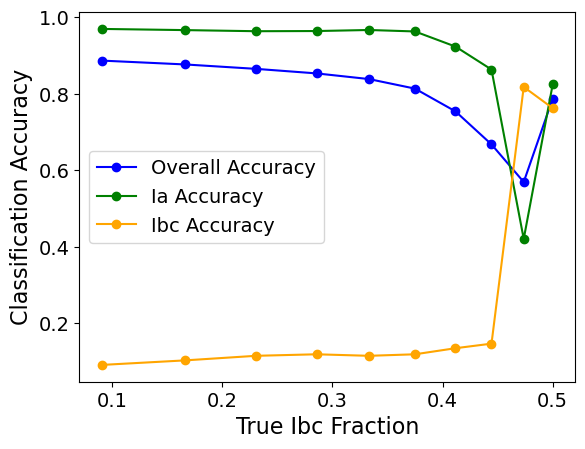

In [942]:
plt.plot(ratios, accuracies_spec[0,:], marker='o', color='blue', label='Overall Accuracy')
plt.plot(ratios, accuracies_spec[1,:], marker='o', color='green', label='Ia Accuracy')
plt.plot(ratios, accuracies_spec[2,:], marker='o', color='orange', label='Ibc Accuracy')

# plt.plot(ratios, accuracies_phot[0,:], marker='o', color='red', label='Photometric redshifts')
plt.xlabel("True Ibc Fraction", fontsize=16)
plt.ylabel("Classification Accuracy", fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(fontsize=14)
# plt.savefig("figures/accuracy_vs_true_fraction.pdf", bbox_inches='tight')
plt.show()

In [913]:
known_sne = np.random.choice(all_sne, size=int(0.1 * len(all_sne)), replace=False)

def fit_gmm_fix_some_classes(sn_sample = all_sne, initial_alpha = 0.45, verbose = False):

    mus_a = {}
    mus_b = {}
    sigmas_a = {}
    sigmas_b = {}

    # params_to_use = ['z', 'c', 'mej', 'x1', 'log_x0', 'log_fni', 'log_vej', 
    #                  'log_ia_chisq', 'log_ibc_chisq', 'log_mej_err_ratio', 'log_vej_err_ratio', 
    #                  'log_fni_err_ratio', 'log_x0_err_ratio', 
    #                  'log_x1_err_ratio', 'log_c_err_ratio']

    print(len(sn_sample))
    known_sne = np.random.choice(sn_sample, size=int(0.1 * len(sn_sample)), replace=False)

    # Initialize parameters (median ± std)
    for param_name in params_to_use:
        # mus_a[param_name] = np.median(get_param_samples(param_name, sn_sample)) - np.std(get_param_samples(param_name, sn_sample))
        # mus_b[param_name] = np.median(get_param_samples(param_name, sn_sample)) + np.std(get_param_samples(param_name, sn_sample))
        mus_a[param_name] = np.median(get_param_samples(param_name, sn_sample))
        mus_b[param_name] = np.median(get_param_samples(param_name, sn_sample))
        
        sigmas_a[param_name] = np.std(get_param_samples(param_name, sn_sample))
        sigmas_b[param_name] = np.std(get_param_samples(param_name, sn_sample))

    num_epochs = 100
    lls = np.zeros(num_epochs)

    alphas = np.zeros(num_epochs)
    alpha = initial_alpha
    gammas_a = defaultdict(list)
    gammas_b = defaultdict(list)

    # Pre-compute sigma clip masks per parameter
    sigma_clip_masks = {}
    for param_name in params_to_use:
        param_samples = get_param_samples(param_name, sn_sample)
        clipped = sigma_clip(param_samples, sigma=10, maxiters=3)
        sigma_clip_masks[param_name] = ~clipped.mask


    # Build index set of known SNe for fast lookup
    known_set = set(id(sn) for sn in known_sne)

    # Uniform weights
    weights = {}
    for param_name in params_to_use:
        weights[param_name] = np.ones(len(sn_sample))

        # # set weights of known SNe to 10 and all others to 1
        # for i, sn in enumerate(sn_sample):
        #     if sn in known_sne:
        #         weights[param_name][i] = 100




    # EM iterations
    for epoch in range(num_epochs):
        for param_name in params_to_use:
            param_samples = get_param_samples(param_name, sn_sample)
            mask = sigma_clip_masks[param_name]
            param_samples = param_samples[mask]
            these_weights = weights[param_name][mask]


            # E-step
            gammas_a[param_name] = alpha * norm.pdf(param_samples, mus_a[param_name], sigmas_a[param_name])
            gammas_b[param_name] = (1 - alpha) * norm.pdf(param_samples, mus_b[param_name], sigmas_b[param_name])

            all_gammas_min = min(min(gammas_a[param_name]), min(gammas_b[param_name]))
            all_gammas_max = max(max(gammas_a[param_name]), max(gammas_b[param_name]))
            # print(all_gammas_min, all_gammas_max)

            # Fix gammas for known SNe (group A = SN Ia, group B = SN Ibc)
            # Use mask-aware indexing: only iterate over non-clipped samples
            mask_indices = np.where(mask)[0]
            for j, orig_idx in enumerate(mask_indices):
                sn = sn_sample[orig_idx]

                if id(sn) in known_set:
                    if sn.true_class == 'SN Ia':
                        gammas_a[param_name][j] = 10  * all_gammas_max
                        gammas_b[param_name][j] = all_gammas_min
                    else:
                        gammas_b[param_name][j] = 10 * all_gammas_max
                        gammas_a[param_name][j] = all_gammas_min


            gamma_total = (gammas_a[param_name] + gammas_b[param_name])
            gammas_a[param_name] /= gamma_total
            gammas_b[param_name] /= gamma_total


            # M-step with weights
            mus_a[param_name] = np.sum(these_weights * gammas_a[param_name] * param_samples) / np.sum(these_weights * gammas_a[param_name])
            mus_b[param_name] = np.sum(these_weights * gammas_b[param_name] * param_samples) / np.sum(these_weights * gammas_b[param_name])
            sigmas_a[param_name] = np.sqrt(np.sum(these_weights * gammas_a[param_name] * (param_samples - mus_a[param_name])**2) / np.sum(these_weights * gammas_a[param_name]))
            sigmas_b[param_name] = np.sqrt(np.sum(these_weights * gammas_b[param_name] * (param_samples - mus_b[param_name])**2) / np.sum(these_weights * gammas_b[param_name]))

            if sigmas_a[param_name] < 0.001:
                sigmas_a[param_name] = 0.001
            if sigmas_b[param_name] < 0.001:
                sigmas_b[param_name] = 0.001

        alpha = np.mean(np.concatenate([gammas_a[param_name] for param_name in params_to_use]))
        alphas[epoch] = alpha
        if verbose:
            print("Alpha", alpha)

        # Log likelihood on clipped samples
        for param_name in params_to_use:
            mask = sigma_clip_masks[param_name]
            lls[epoch] += log_likelihood([mus_a[param_name], sigmas_a[param_name], mus_b[param_name], sigmas_b[param_name]],
                                         get_param_samples(param_name, sn_sample)[mask], alpha)

    fit_params = mus_a, mus_b, sigmas_a, sigmas_b

    # Recompute gammas on ALL samples for classification
    for param_name in params_to_use:
        param_samples = get_param_samples(param_name, sn_sample)
        gammas_a[param_name] = alpha * norm.pdf(param_samples, mus_a[param_name], sigmas_a[param_name])
        gammas_b[param_name] = (1 - alpha) * norm.pdf(param_samples, mus_b[param_name], sigmas_b[param_name])
        gamma_total = (gammas_a[param_name] + gammas_b[param_name])
        gammas_a[param_name] /= gamma_total
        gammas_b[param_name] /= gamma_total

    return alpha, lls[-1], gammas_a, gammas_b, fit_params

In [914]:
fixed_alpha, _, fixed_gammas_a, fixed_gammas_b, fit_params = fit_gmm_fix_some_classes(all_sne,  verbose = True)
print("Alpha:", fixed_alpha)
classify_sample_entropy(all_sne, fixed_gammas_a, fixed_gammas_b)

2674
Alpha 0.4933245507900479
Alpha 0.5342600715216452
Alpha 0.5925729602751493
Alpha 0.659529453272044
Alpha 0.7144139241445804
Alpha 0.7537337069210434
Alpha 0.7820362784633026
Alpha 0.8029890348809656
Alpha 0.8188467816584067
Alpha 0.8310690769457617
Alpha 0.8406604883092772
Alpha 0.8483260909165131
Alpha 0.8545563474093213
Alpha 0.8596855709828412
Alpha 0.8639380436181394
Alpha 0.8674656262803537
Alpha 0.8703770054104729
Alpha 0.8727579700119816
Alpha 0.8746831877627483
Alpha 0.8762213589214994
Alpha 0.8774362687445992
Alpha 0.8783860115770394
Alpha 0.8791219237319677
Alpha 0.8796879727991143
Alpha 0.8801207762703394
Alpha 0.8804501261467049
Alpha 0.8806998098686676
Alpha 0.8808885411868034
Alpha 0.8810308733567633
Alpha 0.8811380234411517
Alpha 0.8812185777592692
Alpha 0.8812790741652387
Alpha 0.881324470568805
Alpha 0.8813585150583954
Alpha 0.8813840343784375
Alpha 0.881403156535538
Alpha 0.8814174812960589
Alpha 0.8814282100416087
Alpha 0.8814362442523375
Alpha 0.881442259958486

(0.9267015706806283, 0.9710982658959537, 0.5)

KeyError: 'log_x0'

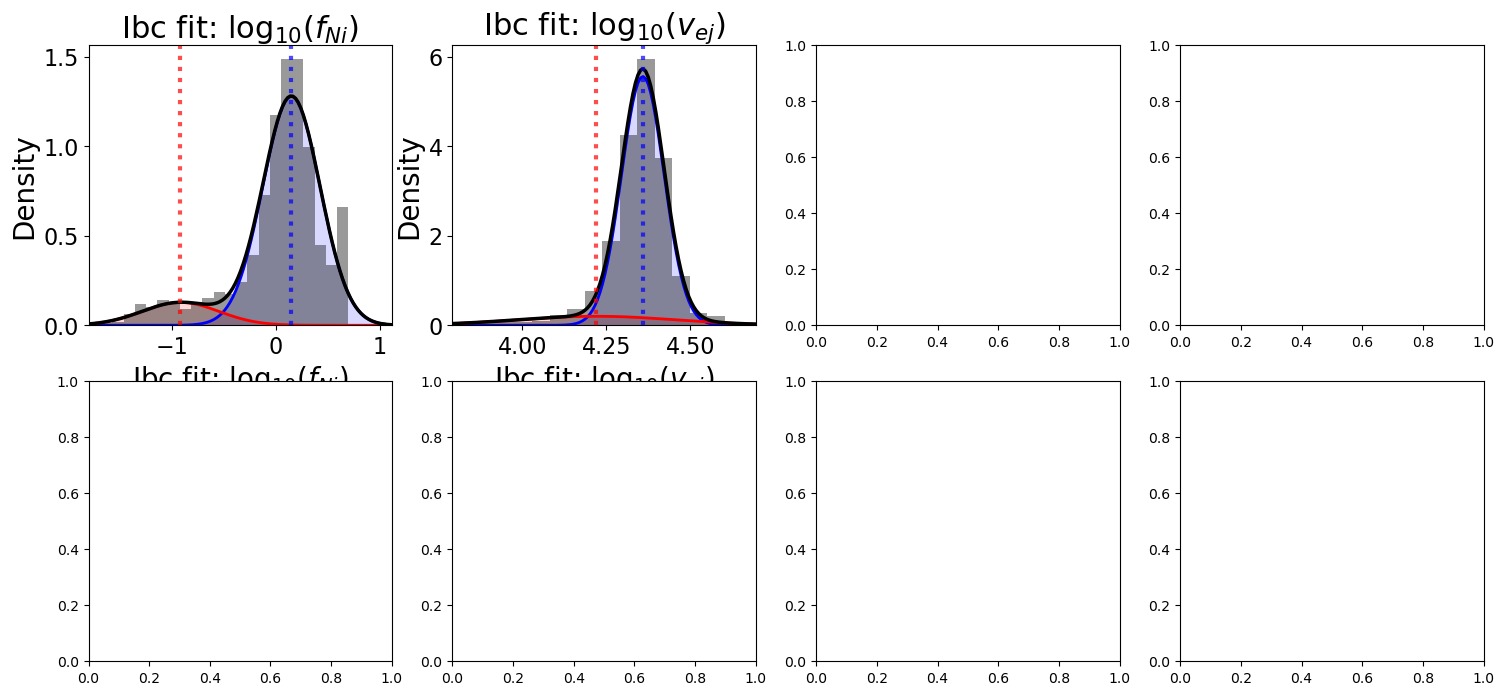

In [915]:
# Plot GMM fits
params_plot = ['log_fni','log_vej',  'log_x0', 'c', 'mej',   'x1', 
                     'log_ia_chisq', 'log_ibc_chisq']

fig, axes = plt.subplots(2, len(params_plot)//2, figsize=(18, 8))

mus_a, mus_b, sigmas_a, sigmas_b = fit_params

for idx, param in enumerate(params_plot):
    ax = axes.flat[idx]
    
    # Get samples and set up parameters
    samples = np.array([sn.ia_fit[param] if param in ia_param_names else sn.ibc_fit[param] 
                        for sn in all_sne])
    known_samples = np.array([sn.ia_fit[param] if param in ia_param_names else sn.ibc_fit[param] 
                             for sn in all_sne if sn in known_sne])
    mu_a, mu_b = mus_a[param], mus_b[param]
    sigma_a, sigma_b = sigmas_a[param], sigmas_b[param]

    x = x_ranges[param]
    
    # Plot histogram
    n, bins, patches = ax.hist(samples, bins=25, density=True, alpha=0.4,
                                color='black', linewidth=0.5, label='Data')
    
    # Overplot known SNe
    # ax.hist(known_samples, bins=bins, weights=0.1*np.ones(len(known_samples)),
    #         color='green', linewidth=1.5, label='Known SNe')
    
    # Compute mixture components
    y_a = fixed_alpha * norm.pdf(x, mu_a, sigma_a)
    y_b = (1 - fixed_alpha) * norm.pdf(x, mu_b, sigma_b)
    y_mix = y_a + y_b
    
    # Plot components
    ax.plot(x, y_a, 'b-', linewidth=2, label=f'Component A (α={fixed_alpha:.2f})')
    ax.plot(x, y_b, 'r-', linewidth=2, label=f'Component B (1-α={1-fixed_alpha:.2f})')
    ax.plot(x, y_mix, 'k-', linewidth=2.5, label='Mixture')
    
    # Fill under curves
    ax.fill_between(x, y_a, alpha=0.15, color='blue')
    ax.fill_between(x, y_b, alpha=0.15, color='red')
    
    # Set axis limits
    data_min, data_max = np.percentile(samples, [1, 99])
    x_margin = (data_max - data_min) * 0.2
    ax.set_xlim(max(x[0], data_min - x_margin), min(x[-1], data_max + x_margin))
    
    # Styling
    ax.set_xlabel(param_labels[param], fontsize=labelfontsize)
    ax.set_ylabel('Density', fontsize=labelfontsize)
    ax.set_title(param_labels[param], fontsize=titlefontsize)
    ax.tick_params(axis='both', labelsize=tickfontsize)
    # ax.legend(fontsize=labelfontsize)
    
    # Add mean markers
    ax.axvline(mu_a, color='blue', linestyle=':', alpha=0.7, linewidth=3)
    ax.axvline(mu_b, color='red', linestyle=':', alpha=0.7, linewidth=3)

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

2673
['log_vej', 'log_fni']
2423
['log_vej', 'log_fni']
2173
['log_vej', 'log_fni']
1923
['log_vej', 'log_fni']
1673
['log_vej', 'log_fni']
1423
['log_vej', 'log_fni']
1173
['log_vej', 'log_fni']
923
['log_vej', 'log_fni']
673
['log_vej', 'log_fni']
423
['log_vej', 'log_fni']


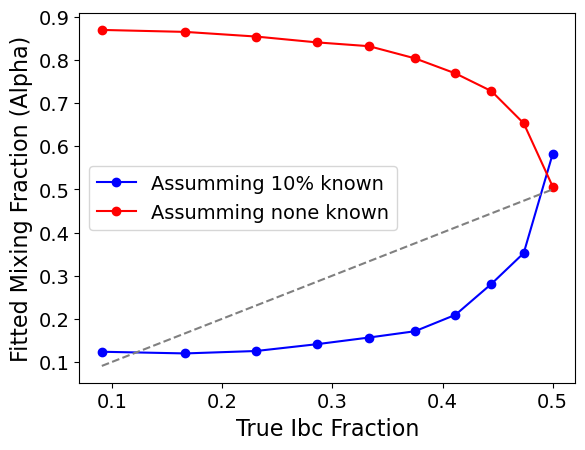

In [917]:
final_alphas_fixed, accuracies_fixed = mixing_fraction_analysis(true_ia_sne, true_ibc_sne, ratios, 
                                                                fitting_method=fit_gmm_fix_some_classes)

plt.plot(ratios, 1 - np.array(final_alphas_fixed), marker='o', color='blue', label='Assumming 10% known')
plt.plot(ratios, 1 - np.array(final_alphas_spec), marker='o', color='red', label='Assumming none known')
plt.plot(ratios, ratios, linestyle='--', color='gray')
plt.xlabel("True Ibc Fraction", fontsize=16)
plt.ylabel("Fitted Mixing Fraction (Alpha)", fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(fontsize=14)
# plt.savefig("figures/alpha_vs_true_fraction.pdf", bbox_inches='tight')
plt.show()

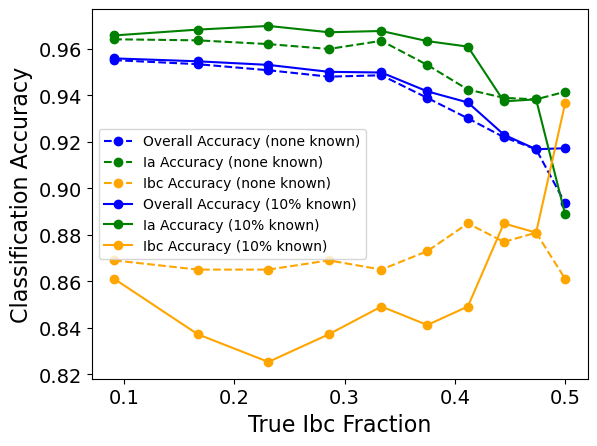

In [918]:
plt.plot(ratios, accuracies_spec[0,:], marker='o', color='blue', linestyle = '--', label='Overall Accuracy (none known)')
plt.plot(ratios, accuracies_spec[1,:], marker='o', color='green', linestyle = '--', label='Ia Accuracy (none known)')
plt.plot(ratios, accuracies_spec[2,:], marker='o', color='orange', linestyle = '--', label='Ibc Accuracy (none known)')

plt.plot(ratios, accuracies_fixed[0,:], marker='o', color='blue', label='Overall Accuracy (10% known)')
plt.plot(ratios, accuracies_fixed[1,:], marker='o', color='green', label='Ia Accuracy (10% known)')
plt.plot(ratios, accuracies_fixed[2,:], marker='o', color='orange', label='Ibc Accuracy (10% known)')


# plt.plot(ratios, accuracies_phot[0,:], marker='o', color='red', label='Photometric redshifts')
plt.xlabel("True Ibc Fraction", fontsize=16)
plt.ylabel("Classification Accuracy", fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(fontsize=10)
# plt.savefig("figures/accuracy_vs_true_fraction.pdf", bbox_inches='tight')
plt.show()

## Feature importance analysis

In [943]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.inspection import permutation_importance

def feature_importance_analysis(sn_sample, params_to_use=None, known_fraction=0.1, plot=True, use_permutation=True, figsize=(20, 6), random_state=None):
    """
    Perform feature importance analysis using Random Forest classifier.
    Only uses a fraction of the sample as "known" labeled data.
    
    Parameters:
    -----------
    sn_sample : array-like
        Array of SN objects to analyze (must have true_class attribute)
    params_to_use : list, optional
        List of parameter names to use as features. If None, uses default set.
    known_fraction : float, default=0.1
        Fraction of sample to use as "known" labeled data (0 to 1)
    plot : bool, default=True
        Whether to plot the feature importances
    use_permutation : bool, default=True
        Whether to also compute permutation importance (more reliable but slower)
    figsize : tuple, default=(20, 6)
        Figure size for plots
    random_state : int, optional
        Random seed for reproducibility
    
    Returns:
    --------
    dict with keys:
        'forest': trained RandomForestClassifier
        'importances': feature importances from forest
        'std': standard deviation of importances across trees
        'params': list of parameter names used
        'known_sne': the subset of SNe used as known sample
        'permutation_result': permutation importance result (if use_permutation=True)
    """
    if params_to_use is None:
        params_to_use = ['z', 'c', 'mej', 'x1', 'log_x0', 'log_fni', 'log_vej', 
                         'log_ia_chisq', 'log_ibc_chisq', 'log_mej_err_ratio', 'log_vej_err_ratio', 
                         'log_fni_err_ratio', 'log_x0_err_ratio', 
                         'log_x1_err_ratio', 'log_c_err_ratio']
    
    # Select only a fraction of the sample as "known" labeled data
    if random_state is not None:
        np.random.seed(random_state)
    known_size = int(known_fraction * len(sn_sample))
    known_sne = np.random.choice(sn_sample, size=known_size, replace=False)
    
    # Create labels: 1 for SN Ia, 0 for SN Ibc (only for known sample)
    labels = np.array([1 if sn.true_class == 'SN Ia' else 0 for sn in known_sne])
    
    # Extract features (only for known sample)
    features = np.array([get_param_samples(param_name, known_sne) for param_name in params_to_use]).T
    
    # Train Random Forest
    forest = RandomForestClassifier(random_state=0, n_estimators=1000, class_weight='balanced')
    forest.fit(features, labels)
    
    # Get feature importances
    importances = forest.feature_importances_
    std = np.std([tree.feature_importances_ for tree in forest.estimators_], axis=0)
    
    result = {
        'forest': forest,
        'importances': importances,
        'std': std,
        'params': params_to_use,
        'labels': labels,
        'features': features,
        'known_sne': known_sne
    }
    
    # Compute permutation importance if requested
    if use_permutation:
        perm_result = permutation_importance(
            forest, features, labels, n_repeats=1000, random_state=42, n_jobs=2
        )
        result['permutation_result'] = perm_result
    
    # Plot if requested
    if plot:
        if use_permutation:
            fig, axes = plt.subplots(1, 2, figsize=(figsize[0], figsize[1]))
            
            # Tree-based importance
            axes[0].bar(params_to_use, importances, yerr=std, align='center', alpha=0.7, ecolor='black', capsize=5)
            axes[0].set_xticklabels(params_to_use, rotation=45, ha='right')
            axes[0].set_ylabel('Importance')
            axes[0].set_title('Tree-based Feature Importance')
            
            # Permutation importance
            axes[1].bar(params_to_use, perm_result.importances_mean, yerr=perm_result.importances_std, 
                       align='center', alpha=0.7, ecolor='black', capsize=5)
            axes[1].set_xticklabels(params_to_use, rotation=45, ha='right')
            axes[1].set_ylabel('Importance')
            axes[1].set_title('Permutation Feature Importance')
            
            plt.tight_layout()
        else:
            fig, ax = plt.subplots(figsize=figsize)
            ax.bar(params_to_use, importances, yerr=std, align='center', alpha=0.7, ecolor='black', capsize=10)
            ax.set_xticklabels(params_to_use, rotation=45, ha='right')
            ax.set_ylabel('Importance')
            ax.set_title('Tree-based Feature Importance')
            plt.tight_layout()
        
        plt.show()
    
    print(f"Used {len(known_sne)} known SNe ({known_fraction*100:.0f}% of {len(sn_sample)} total)")
    print(f"Known sample: {sum(labels)} Ia, {len(labels) - sum(labels)} Ibc")
    print(f"Top 5 tree importance features: {', '.join([params_to_use[i] for i in np.argsort(importances)[::-1][:5]])}")
    print(f"Top 5 permutation importance features: {', '.join([params_to_use[i] for i in np.argsort(perm_result.importances_mean)[::-1][:5]])}")
    
    return result

/var/folders/0r/_1bnthz146q2xj0c42f4nl_80000gq/T/ipykernel_22409/686067592.py:86: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[0].set_xticklabels(params_to_use, rotation=45, ha='right')
/var/folders/0r/_1bnthz146q2xj0c42f4nl_80000gq/T/ipykernel_22409/686067592.py:93: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[1].set_xticklabels(params_to_use, rotation=45, ha='right')


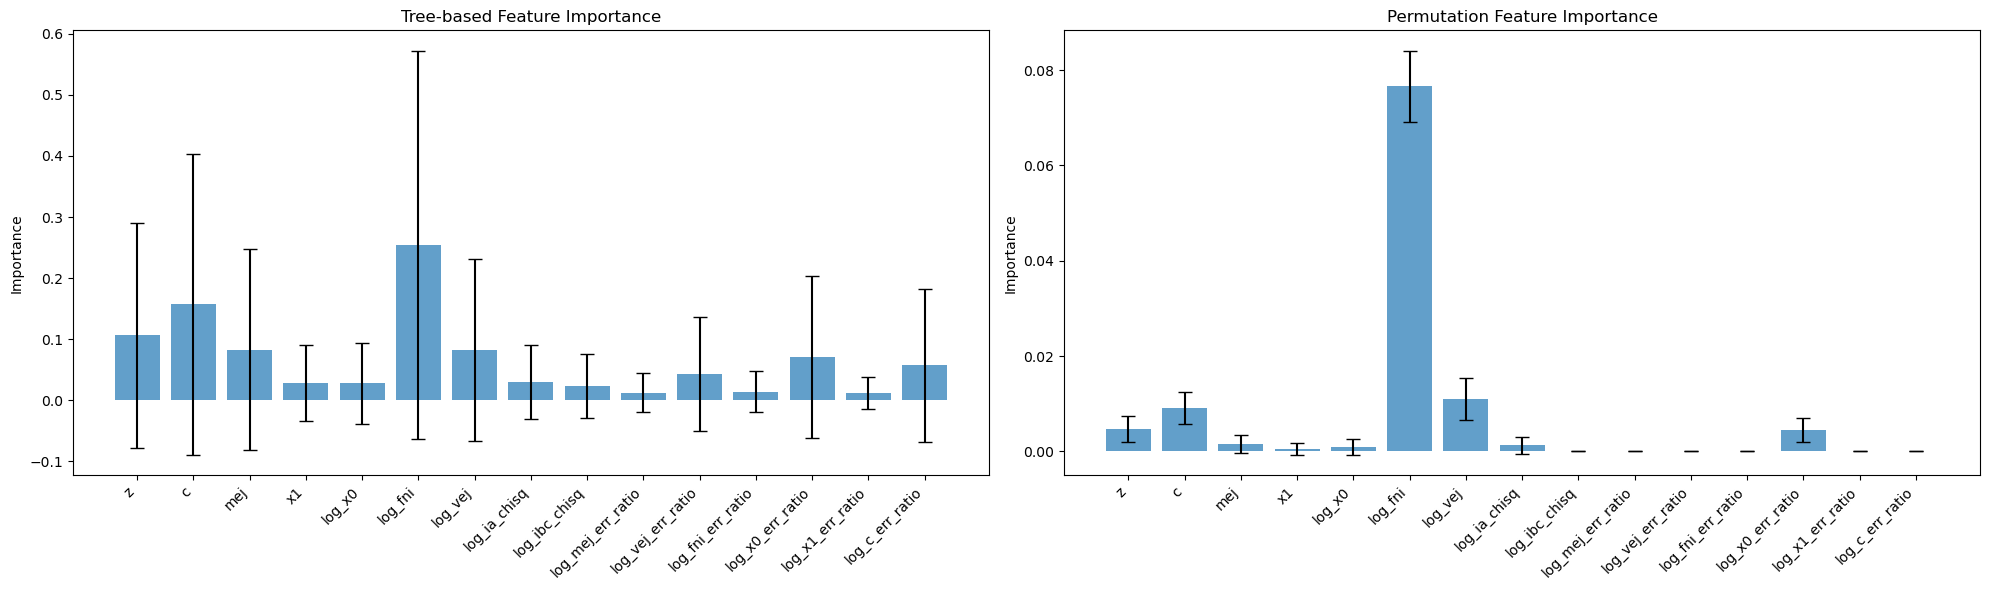

Used 267 known SNe (10% of 2674 total)
Known sample: 241 Ia, 26 Ibc
Top 5 tree importance features: log_fni, c, z, mej, log_vej
Top 5 permutation importance features: log_fni, log_vej, c, z, log_x0_err_ratio


In [944]:
result = feature_importance_analysis(all_sne)

503 252 2422


/var/folders/0r/_1bnthz146q2xj0c42f4nl_80000gq/T/ipykernel_22409/686067592.py:86: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[0].set_xticklabels(params_to_use, rotation=45, ha='right')
/var/folders/0r/_1bnthz146q2xj0c42f4nl_80000gq/T/ipykernel_22409/686067592.py:93: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[1].set_xticklabels(params_to_use, rotation=45, ha='right')


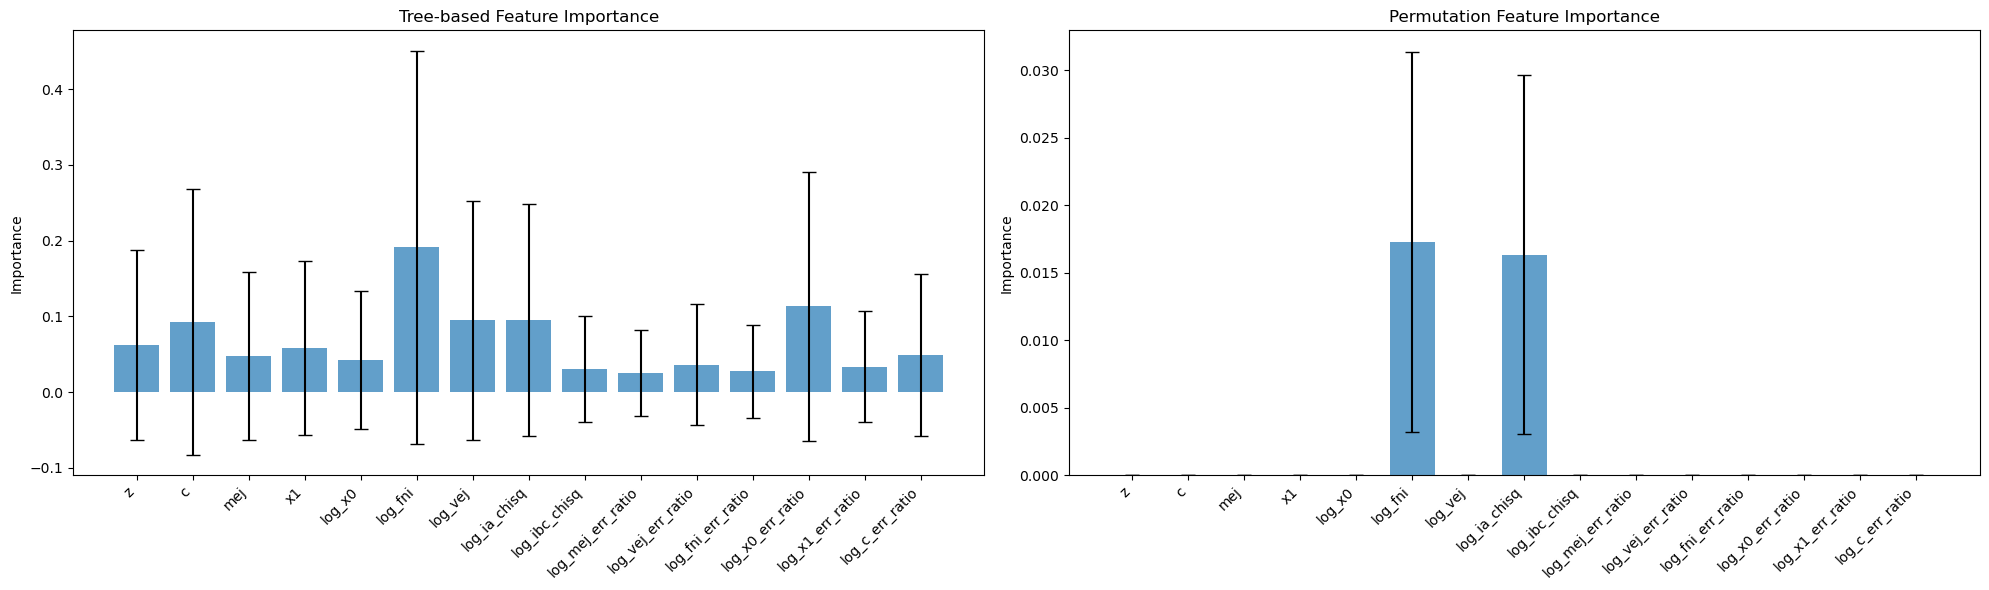

Used 50 known SNe (10% of 503 total)
Known sample: 28 Ia, 22 Ibc
Top 5 tree importance features: log_fni, log_x0_err_ratio, log_ia_chisq, log_vej, c
Top 5 permutation importance features: log_fni, log_ia_chisq, log_c_err_ratio, log_x1_err_ratio, log_x0_err_ratio


In [945]:
equal_split_sne = np.concatenate((true_ia_sne[1:len(true_ibc_sne)], true_ibc_sne))
print(len(equal_split_sne), len(true_ibc_sne), len(true_ia_sne))


equal_split_result = feature_importance_analysis(equal_split_sne, known_fraction = 0.1)

In [165]:
params_to_use = ['z', 'c', 'mej', 'x1', 'log_x0', 'log_fni', 'log_vej', 
                     'log_ia_chisq', 'log_ibc_chisq', 'log_mej_err_ratio', 'log_vej_err_ratio', 
                     'log_fni_err_ratio', 'log_x0_err_ratio', 
                     'log_x1_err_ratio', 'log_c_err_ratio']

known_sne = np.random.choice(all_sne, size=int(0.1 * len(all_sne)), replace=False)
print(len(known_sne))

labels = np.array([1 if sn.true_class == 'SN Ia' else 0 for sn in known_sne])

features = np.array([get_param_samples(param_name, known_sne)for param_name in params_to_use]).T

from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(random_state=0)
forest.fit(features, labels)


267


RandomForestClassifier(random_state=0)

In [166]:
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_], axis=0)

<BarContainer object of 15 artists>

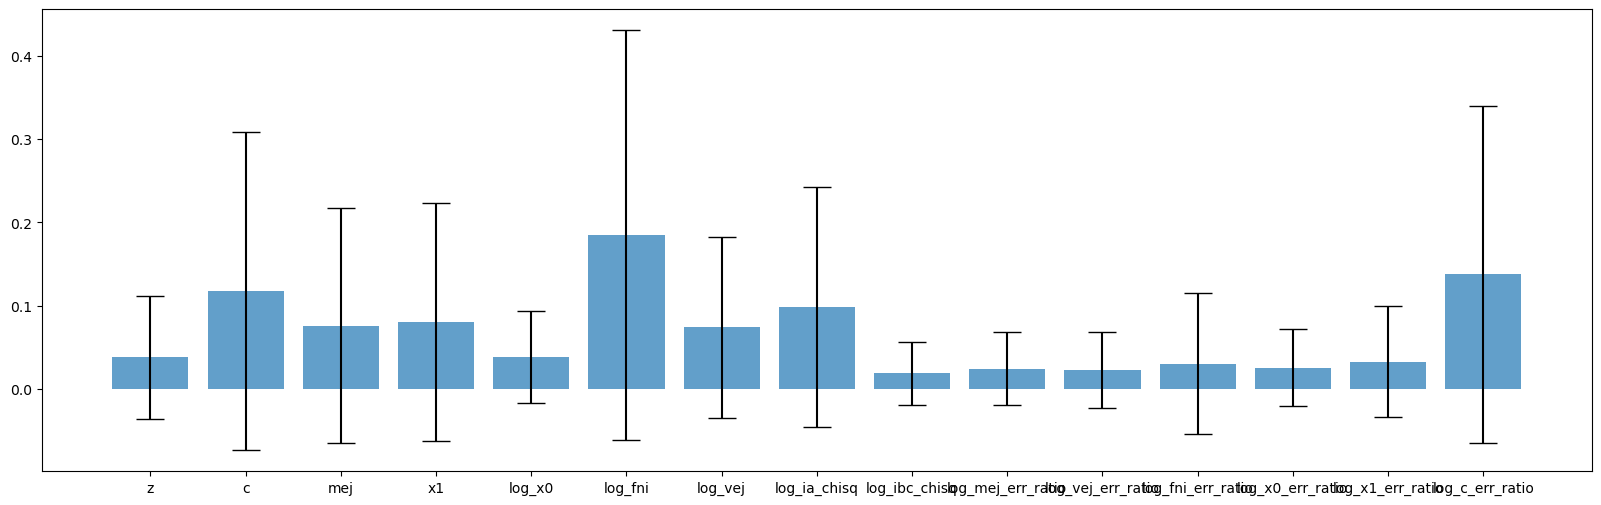

In [167]:
fig, ax = plt.subplots(figsize=(20, 6))
plt.bar(params_to_use, importances, yerr=std, align='center', alpha=0.7, ecolor='black', capsize=10)

In [168]:
from sklearn.inspection import permutation_importance

result = permutation_importance(
    forest, features, labels, n_repeats=10, random_state=42, n_jobs=2
)

<BarContainer object of 15 artists>

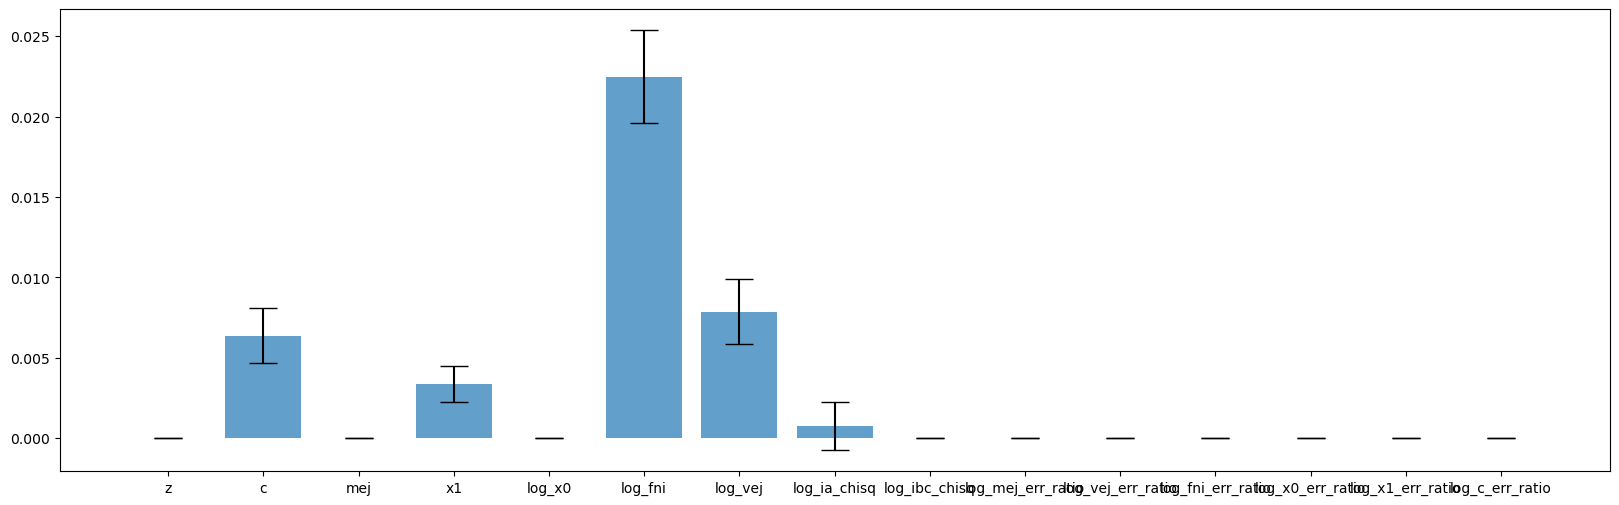

In [169]:
fig, ax = plt.subplots(figsize=(20, 6))
plt.bar(params_to_use, result.importances_mean, yerr=result.importances_std, align='center', alpha=0.7, ecolor='black', capsize=10)

In [170]:
equal_split_sne = np.concatenate((true_ia_sne[1:len(true_ibc_sne)], true_ibc_sne))
print(len(equal_split_sne), len(true_ibc_sne), len(true_ia_sne))


503 252 2422
